# Lending Club Case Study


#### Group Members:<br>
Shekhar Patel<br>
Ashok Surapuraju(Group Facilitator)

#### Aim:

Identification of driving factors behind loan default to utilise this knowledge for companies portfolio and risk assessment. This knowledge would be used in redcution of credit loss.

In [144]:
#libraries Import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import chardet
import warnings
#Setting warnings to be ignored
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{0:,.2f}'.format

In [145]:
#Detecting the encoding type
with open("loan.csv", 'rb') as rawdata:
    print("loan.csv encoding type is ", chardet.detect(rawdata.read(1000))['encoding'])

loan.csv encoding type is  ascii


Although ascii is found to be encoding type , when i tried using this type ,data frame after import was not correct , with many columns empty. Due to this using default enconding type.

In [146]:
loan = pd.read_csv("loan.csv")
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,"2,400.00",36 months,15.96%,84.33,C,C5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,"10,000.00",36 months,13.49%,339.31,C,C1,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
4,1075358,1311748,3000,3000,"3,000.00",60 months,12.69%,67.79,B,B5,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


### Data understanding:

In [147]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00",...,0.00,0.00,0.00,0.00,"39,020.00","39,678.00",0.00,0.00,0.00,0.00
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,...,nan,nan,nan,nan,0.04,0.00,nan,nan,nan,nan
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,...,nan,nan,nan,nan,0.20,0.00,nan,nan,nan,nan
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,...,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,...,nan,nan,nan,nan,2.00,0.00,nan,nan,nan,nan


In [148]:
loan.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              39717 non-null  int64  
 1   member_id                       39717 non-null  int64  
 2   loan_amnt                       39717 non-null  int64  
 3   funded_amnt                     39717 non-null  int64  
 4   funded_amnt_inv                 39717 non-null  float64
 5   term                            39717 non-null  object 
 6   int_rate                        39717 non-null  object 
 7   installment                     39717 non-null  float64
 8   grade                           39717 non-null  object 
 9   sub_grade                       39717 non-null  object 
 10  emp_title                       37258 non-null  object 
 11  emp_length                      38642 non-null  object 
 12  home_ownership                 

### Data Cleaning

In [149]:
#Definig a function to check the null values in loan data frame and return the missing values percentage of columns
#which have atlease 1 missing value
def loan_null_vals(loan):
    missing = round((loan.isnull().sum()/len(loan.index))*100,2)
    missing = missing[missing > 0]
    return missing

In [150]:
loan_null = loan_null_vals(loan)
All_Null_Columns = list(loan_null[loan_null >= 50].index)
print("No of columns with >= 50% null values", len(All_Null_Columns))

No of columns with >= 50% null values 57


As we can see there are 57 columns with >=50% null values. As the null percentage is huge we remove them so that our analysis is not affect by these columns.

In [151]:
loan = loan.drop(All_Null_Columns,axis=1)

In [152]:
loan.shape

(39717, 54)

In [153]:
#Inspecting the rest of the columns which have missing values 
loan_null = loan_null_vals(loan)
print(loan_null)

emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64


In [154]:
#Cloumns desc has the highest missing value percentage. So inspecting it first.
loan.desc.value_counts()

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              210
Debt Consolidation                                                    

This seems to be the loan request reason provided by the borrower in some cases and the type of loan in some cases. We are majorly interested in the type of loan information which is already provided to us in the data set from column title. So , dropping this column would not affect our analysis.

In [155]:
loan = loan.drop('desc',axis=1)

In [156]:
#Checking the rest of the columns on loan data frame for null values
loan_null = loan_null_vals(loan)
print(loan_null)

emp_title                    6.19
emp_length                   2.71
title                        0.03
revol_util                   0.13
last_pymnt_d                 0.18
last_credit_pull_d           0.01
collections_12_mths_ex_med   0.14
chargeoff_within_12_mths     0.14
pub_rec_bankruptcies         1.75
tax_liens                    0.10
dtype: float64


In [157]:
#Checking the unique values in each column to understand the column significance to check if we can drop any data
loan[loan_null.index].nunique()

emp_title                     28820
emp_length                       11
title                         19615
revol_util                     1089
last_pymnt_d                    101
last_credit_pull_d              106
collections_12_mths_ex_med        1
chargeoff_within_12_mths          1
pub_rec_bankruptcies              3
tax_liens                         1
dtype: int64

Lets inspect the columns with least unique values to undertsand them.

In [158]:
#Inspecting collections_12_mths_ex_med,chargeoff_within_12_mths,tax_liens which have only 1 unique value                 
print("Unique values in collections_12_mths_ex_med",loan["collections_12_mths_ex_med"].unique())
print("Unique values in chargeoff_within_12_mths",loan["chargeoff_within_12_mths"].unique())
print("Unique values in tax_liens",loan["tax_liens"].unique())

Unique values in collections_12_mths_ex_med [ 0. nan]
Unique values in chargeoff_within_12_mths [ 0. nan]
Unique values in tax_liens [ 0. nan]


As the unique values in these columns are [0 , nan] these columns won't contribute to our analysis so removing them.

In [159]:
loan = loan.drop(['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'],axis=1)
loan.shape

(39717, 50)

In [160]:
#Inspecting pub_rec_bankruptcies which has 3 unique values
print("Unique values in pub_rec_bankruptcies",loan["pub_rec_bankruptcies"].unique())
print("Percentage of null values in pub_rec_bankruptcies",
      round((loan.pub_rec_bankruptcies.isnull().sum()/len(loan.index))*100,2))
print("Value Counts of pub_rec_bankruptcies\n",loan.pub_rec_bankruptcies.value_counts())

Unique values in pub_rec_bankruptcies [ 0.  1.  2. nan]
Percentage of null values in pub_rec_bankruptcies 1.75
Value Counts of pub_rec_bankruptcies
 0.00    37339
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64


pub_rec_bankruptcies represents the number of public record bankruptcies which is an important indicator in our risk assesment.
We will be dropping the missing value columns as we cannot perform an effective imputation here as mean,median imputation wouldn't be valid. We can perform imputation on mode , but we feel that it won't be a contributor to our analysis as the value counts of the mode is 0 and the value_counts for 0 for pub_rec_bankruptcies is already very high compared with others. So. Imputation wouldn't add any value to our analysis.

In [161]:
loan = loan[~loan.pub_rec_bankruptcies.isnull()]
loan.shape

(39020, 50)

In [162]:
#Checking the rest of the columns on loan data frame for null values
loan_null = loan_null_vals(loan)
loan_null

emp_title      6.19
emp_length     2.75
title          0.03
revol_util     0.13
last_pymnt_d   0.18
dtype: float64

In [163]:
#Inspecting emp_title and emp_length
print("Unique values in emp_title",loan["emp_title"].unique)
print("Unique values in emp_length",loan["emp_length"].unique)

Unique values in emp_title <bound method Series.unique of 0                             NaN
1                           Ryder
2                             NaN
3             AIR RESOURCES BOARD
4        University Medical Group
                   ...           
39562               E.E. Wine Inc
39573                         NaN
39623                     Maximus
39666                        ARIN
39680     Fairfield Manufacturing
Name: emp_title, Length: 39020, dtype: object>
Unique values in emp_length <bound method Series.unique of 0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39562       1 year
39573      3 years
39623      8 years
39666      2 years
39680      2 years
Name: emp_length, Length: 39020, dtype: object>


From the data we understood that emp_title is categorical in nature.
So, we are dropping the records with null values in these columns.
We are dropping the missing the values in emp_length column as well as members with values nan either can be considered as self-employed or jobless where one conflicts the other. So, we feel imputation wouldn't be the best way here.

In [164]:
loan = loan[~(pd.isnull(loan.emp_title) | pd.isnull(loan.emp_length))]
loan.shape

(36548, 50)

In [165]:
#Checking the rest of the columns on loan data frame for null values
loan_null = loan_null_vals(loan)
loan_null

title          0.02
revol_util     0.13
last_pymnt_d   0.18
dtype: float64

In [166]:
loan[loan_null.index].nunique()

title           18005
revol_util       1082
last_pymnt_d       97
dtype: int64

All the above columns have enough unique values and
title  represents The loan title provided by the borrower
revol_util represents Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
last_pymnt_d Last month payment was received
We will be dropping the records with null values in these columns.

In [167]:
loan = loan[~(pd.isnull(loan.title) | pd.isnull(loan.revol_util) | pd.isnull(loan.last_pymnt_d))]
loan.shape

(36433, 50)

In [168]:
#Checking the rest of the columns on loan data frame for null values
loan_null = loan_null_vals(loan)
len(loan_null)

0

Data Cleaning has been done , we furthur drill down into data and understand the significace of each of the left over column in our analysis. Here we are checking the columns which do not add value to our analysis. Such columns ideally have either 1 or n unique values. We will identify such columns and determine the significane of each column.

In [169]:
((loan.nunique() == 1) | (loan.nunique() == loan.shape[0])).sort_values(ascending=False)

id                          True
acc_now_delinq              True
application_type            True
policy_code                 True
member_id                   True
delinq_amnt                 True
url                         True
pymnt_plan                  True
initial_list_status         True
home_ownership             False
purpose                    False
loan_status                False
issue_d                    False
verification_status        False
annual_inc                 False
sub_grade                  False
emp_length                 False
emp_title                  False
zip_code                   False
grade                      False
installment                False
int_rate                   False
term                       False
funded_amnt_inv            False
funded_amnt                False
loan_amnt                  False
title                      False
pub_rec_bankruptcies       False
addr_state                 False
dti                        False
last_credi

We can see that 9 columns match our filter conditions.<br>

id                          
acc_now_delinq              
application_type            
policy_code                 
member_id                   
delinq_amnt                 
url                         
pymnt_plan                  
initial_list_status

From the Data Dictionary , we can understand the significane of each column.

<b>id</b>:<br>
A unique LC assigned ID for the loan listing. Ideally a random number which doesn't contribute in the risk analysis of a loan applicant.

<b>acc_now_delinq</b>:<br>
The number of accounts on which the borrower is now delinquent.All the rows have same value - 0

<b>application_type</b>:<br>
Indicates whether the loan is an individual application or a joint application with two co-borrowers.
All the rows have same value - 'Individual'

<b>policy_code</b>:<br>
1. publicly available policy_code=1
2. new products not publicly available policy_code=2

All rows have same value - 1.


<b>member_id</b>:<br>
A unique LC assigned Id for the borrower member.
Ideally a random number which doesn't contribute in the risk analysis of a loan 

<b>url</b>:<br>
URL for the LC page with listing data.Doesn't contribute in the risk assesment.


<b>pymnt_plan</b>:<br>
Indicates if a payment plan has been put in place for the loan.All rows have same value - 'n'


<b>initial_list_status</b>:<br>
The initial listing status of the loan. Possible values are – W, F.
All rows have same value - f.    

So we will dropping all these columns.

In [170]:
loan = loan.drop([
                    "id",
                    "acc_now_delinq",
                    "application_type",
                    "policy_code",
                    "member_id",
                    "delinq_amnt",
                    "url",
                    "pymnt_plan",
                    "initial_list_status"
                ],axis=1)

In [171]:
# Function to print basic details of specific column
# We will use this column in individual column level analysis
def find_col_details(col):
    print("Variable is",col)
    print("---------------")
    print("Value Counts: ")
    print(loan[col].value_counts())
    print("---------------")
    print(loan[col].describe())
    print("---------------")

In [172]:
#Inspecting Individual Columns and checking if we can drop them
find_col_details("zip_code")

Variable is zip_code
---------------
Value Counts: 
100xx    540
945xx    508
112xx    480
606xx    477
070xx    440
        ... 
250xx      1
169xx      1
391xx      1
386xx      1
789xx      1
Name: zip_code, Length: 806, dtype: int64
---------------
count     36433
unique      806
top       100xx
freq        540
Name: zip_code, dtype: object
---------------


In zip_code column, only first 3 digits of the zip code are visible. Ideally we will use zip_code to determine the location which inturn can be used in our risk assesment to determine whether location plays any roles in a loan being defaulted. But,
We cannot use this zip_code as it has only 3 digits and we cannot determine the location accurately from this column. To determine the location we have another column <b>addr_state</b> which i think would be sufficient for our analysis so adding this column to the list of columns which must be dropped.

In [173]:
columns_tobe_dropped = set()
columns_tobe_dropped.add("zip_code")

After performing the analysis on columns which deal with Amount in the loan data frame and using the definitions in Data Dictionary , we have the following analysis.<br>

<b>funded_amnt</b>:<br>
The total amount committed to that loan at that point in time.

<b>loan_amnt</b>:<br>
The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

<b>funded_amnt_inv</b>:<br>
The total amount committed by investors for that loan at that point in time.

We have both funded_amnt_inv,loan_amnt which give is the picutre of how much the borrower has applied for a loan and how much has been granted by the investor. So,funded_amnt can be dropped.

In [174]:
columns_tobe_dropped.update(["funded_amnt"])

In [175]:
find_col_details("title")

Variable is title
---------------
Value Counts: 
Debt Consolidation                      2064
Debt Consolidation Loan                 1644
Personal Loan                            607
Consolidation                            488
debt consolidation                       467
                                        ... 
Refinancing current Debt to pay off.       1
Lowering high interest rate                1
Debt consoldation                          1
De Cheaper Trash                           1
New England Re-Bath                        1
Name: title, Length: 17954, dtype: int64
---------------
count                  36433
unique                 17954
top       Debt Consolidation
freq                    2064
Name: title, dtype: object
---------------


In [176]:
find_col_details("purpose")

Variable is purpose
---------------
Value Counts: 
debt_consolidation    17470
credit_card            4726
other                  3575
home_improvement       2705
major_purchase         2008
car                    1443
small_business         1414
wedding                 886
medical                 634
moving                  529
house                   343
vacation                336
educational             276
renewable_energy         88
Name: purpose, dtype: int64
---------------
count                  36433
unique                    14
top       debt_consolidation
freq                   17470
Name: purpose, dtype: object
---------------


<b>title</b>:<br>
The loan title provided by the borrower

<b>purpose</b>:<br>
A category provided by the borrower for the loan request.

After study of columns and their respective data above. It's determined that purpose is a main category and title would be sub category which has the detailed reason of the loan. We donot require two columns which provide the same meaning in our analysis as it doesn't add any value. So, we will dropping title column.

In [177]:
columns_tobe_dropped.add("title")

In [178]:
#Analyzing the Recovery fields
find_col_details("recoveries")
find_col_details("collection_recovery_fee")

Variable is recoveries
---------------
Value Counts: 
0.00        32705
12.09           3
11.29           3
10.07           3
13.59           3
            ...  
321.76          1
2,563.40        1
1,573.14        1
4,007.50        1
1,842.51        1
Name: recoveries, Length: 3585, dtype: int64
---------------
count   36,433.00
mean        92.86
std        682.05
min          0.00
25%          0.00
50%          0.00
75%          0.00
max     29,623.35
Name: recoveries, dtype: float64
---------------
Variable is collection_recovery_fee
---------------
Value Counts: 
0.00      33100
1.20         10
2.00          9
2.02          8
1.69          8
          ...  
18.33         1
198.41        1
9.67          1
33.29         1
93.37         1
Name: collection_recovery_fee, Length: 2386, dtype: int64
---------------
count   36,433.00
mean        11.68
std        140.88
min          0.00
25%          0.00
50%          0.00
75%          0.00
max      7,002.19
Name: collection_recovery_fee, dt

<b>recoveries</b>:<br>
post charge off gross recovery

Most of the values are 0. Recovery comes into picture post charge off. So , this varaible doesn't have any effect during the loan issuance cycle where risk assesment comes into picture. So, We can drop this column.

<b>collection_recovery_fee</b>:<br>
post charge off collection fee
Most of the values are 0. Similar to recoveries variable this variable comes into picture post charge off.So, We can drop it.

In [179]:
columns_tobe_dropped.update(["recoveries","collection_recovery_fee"])

In [180]:
find_col_details("total_rec_late_fee")

Variable is total_rec_late_fee
---------------
Value Counts: 
0.00     34618
15.00      224
30.00       51
15.00       49
15.00       42
         ...  
29.91        1
23.82        1
15.61        1
59.78        1
14.94        1
Name: total_rec_late_fee, Length: 1194, dtype: int64
---------------
count   36,433.00
mean         1.30
std          7.07
min          0.00
25%          0.00
50%          0.00
75%          0.00
max        180.20
Name: total_rec_late_fee, dtype: float64
---------------


<b>total_rec_late_fee</b>:<br>
Late fees received to date

Ideally Late fees would not be driving factor for loan default. As per industry standards Late fee would be minimal when compared with the installement amount. Also Late fees can be factor which can determine the probability of default in the Loan Payment cycle , but it's impact would be ideally minimal in loan issuance cycle. So, we will be dropping this column.

In [181]:
columns_tobe_dropped.add("total_rec_late_fee")

In [182]:
#Dropping the Columns 
loan = loan.drop(list(columns_tobe_dropped),axis=1)

In [183]:
#Analyzing date Columns and Converting them to date data type for further use
print("Data types before conversion\n",loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].dtypes)
loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']]=loan[[
                                                                                'issue_d',
                                                                                'earliest_cr_line',
                                                                                'last_pymnt_d',
                                                                                'last_credit_pull_d'
                                                                            ]].apply(lambda x:pd.to_datetime(x, format='%b-%y'))
print("Data types after conversion\n",loan[['issue_d','earliest_cr_line','last_pymnt_d','last_credit_pull_d']].dtypes)

Data types before conversion
 issue_d               object
earliest_cr_line      object
last_pymnt_d          object
last_credit_pull_d    object
dtype: object
Data types after conversion
 issue_d               datetime64[ns]
earliest_cr_line      datetime64[ns]
last_pymnt_d          datetime64[ns]
last_credit_pull_d    datetime64[ns]
dtype: object


In [184]:
#Deriving metrics from issue date column for year and month level analysis
loan['issue_month'] = loan['issue_d'].dt.month
loan['issue_year'] = loan['issue_d'].dt.year

In [185]:
#Analyzing int and float columns
loan.dtypes

loan_amnt                        int64
funded_amnt_inv                float64
term                            object
int_rate                        object
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                 datetime64[ns]
loan_status                     object
purpose                         object
addr_state                      object
dti                            float64
delinq_2yrs                      int64
earliest_cr_line        datetime64[ns]
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_bal                        int64
revol_util                      object
total_acc                        int64
out_prncp                

In [186]:
#Analyzing int_rate and revol_util variables as the look to be % columns from data.
find_col_details("int_rate")
find_col_details("revol_util")

Variable is int_rate
---------------
Value Counts: 
10.99%    901
13.49%    785
11.49%    768
7.51%     731
7.88%     674
         ... 
12.36%      1
13.93%      1
15.45%      1
22.94%      1
11.22%      1
Name: int_rate, Length: 334, dtype: int64
---------------
count      36433
unique       334
top       10.99%
freq         901
Name: int_rate, dtype: object
---------------
Variable is revol_util
---------------
Value Counts: 
0%        852
0.20%      58
70.40%     55
61%        55
64.80%     55
         ... 
69.98%      1
49.69%      1
7.28%       1
70.26%      1
24.66%      1
Name: revol_util, Length: 1082, dtype: int64
---------------
count     36433
unique     1082
top          0%
freq        852
Name: revol_util, dtype: object
---------------


Sanitizing these columns for our further analysis

In [187]:
loan['int_rate'] = loan['int_rate'].str.strip('%').astype('float')
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [188]:
#Analysizing term variable
find_col_details("term")

Variable is term
---------------
Value Counts: 
 36 months    26377
 60 months    10056
Name: term, dtype: int64
---------------
count          36433
unique             2
top        36 months
freq           26377
Name: term, dtype: object
---------------


Converting the variable to appropriate date type for our analysis.

In [189]:
loan.term = loan.term.apply(lambda x: x.split()[0]).astype("int64")

In [190]:
loan.term.value_counts()

36    26377
60    10056
Name: term, dtype: int64

In [191]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

We are mainly inetersted in Fully Paid and Charged Off data.Loans with loan_status current, do not contribute to our analysis. So, filtering them.

In [192]:
loan = loan[~(loan.loan_status == "Current")]

In [193]:
#Deriving numeric values from loan_status
loan['default'] = loan.loan_status.apply(lambda x:1 if x == 'Charged Off' else 0)

In [194]:
loan.default.value_counts()

0    30424
1     4943
Name: default, dtype: int64

In [195]:
loan.emp_length = loan.emp_length.str.replace("+","")
loan.emp_length = loan.emp_length.str.replace("<","")
loan["emp_exp"] = loan.emp_length.apply(lambda x: x.split()[0]).astype("int64")

In [196]:
loan.emp_exp.value_counts()

10    8028
1     6937
2     4083
3     3833
4     3206
5     3043
6     2062
7     1638
8     1361
9     1176
Name: emp_exp, dtype: int64

In [197]:
#Copying to a new data frame for our analysis
df_master_loan = loan

In [198]:
df_master_loan.shape

(35367, 39)

### Data Analysis:

As the assignmnet requires a lot of plots. Defining some common custom plot functions which can be resued in different varaiables analysis.

In [199]:
def mybar(col,title="",xlabel="",ylabel=""):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(data = df_master_loan,x=col,y='default')
    plt.title(title,fontsize=28).set_position([.5, 1.05])
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    plt.grid(color='gray', linestyle='dashed')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(round(x*100,2)) + '%'))
    return ax

In [200]:
def mypie(data,title="",sizex=20,sizey=10,titlefontsize=22):
    plt.figure(figsize=[10,5])
    ax2 = data.default.value_counts().plot.pie(
    autopct='%1.0f%%', 
    pctdistance=0.5, 
    labeldistance=0.7,
    figsize=(sizex, sizey),
    fontsize=22,
    shadow=True
    )
    plt.title(title,fontsize=titlefontsize)
    labels = [r'0-Not Default', r'1-Default']
    ax2.legend(labels)
    return ax2

In [201]:
def mydist(dataframe, col,title="",xlabel="",ylabel=""):
    plt.figure(figsize=(15,5))
    ax = sns.distplot(dataframe[col])
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    plt.grid(color='gray', linestyle='dashed')
    plt.title(title,fontsize=28).set_position([.5, 1.05])
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(round(x*100,2)) + '%'))
    return ax

In [202]:
def myboxplot(col,title,xlabel,ylabel):
    plt.figure(figsize=(15, 5))
    ax = sns.boxplot(x=col, y=df_master_loan['loan_status'], data=df_master_loan)
    plt.title(title,fontsize=28).set_position([.5, 1.05])
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    plt.grid(color='gray', linestyle='dashed')
    return ax

In [203]:
def mycountplot(col,title="",xlabel="",ylabel=""):
    plt.figure(figsize=(15,5))
    ax=sns.countplot(df_master_loan[col])
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    plt.grid(color='gray', linestyle='dashed')
    plt.title(title,fontsize=28).set_position([.5, 1.05])
    return ax

In [204]:
def mybarstacked(data,col,hue,title="",xlabel="",ylabel=""):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=col, y='default', hue=hue, data=data)
    plt.title(title,fontsize=28).set_position([.5, 1.05])
    ax.set_ylabel(ylabel,fontsize=20)
    ax.set_xlabel(xlabel,fontsize=20)
    plt.grid(color='gray', linestyle='dashed')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(round(x*100,2)) + '%'))
    plt.show()

In [205]:
# default rate
'{:.2%}'.format(df_master_loan.default.sum()/df_master_loan.shape[0])

'13.98%'

Analyzing variable - <b>annual_inc</b>

In [206]:
df_master_loan.annual_inc.describe()

count      35,367.00
mean       69,095.99
std        63,967.05
min         4,000.00
25%        41,500.00
50%        60,000.00
75%        82,500.00
max     6,000,000.00
Name: annual_inc, dtype: float64

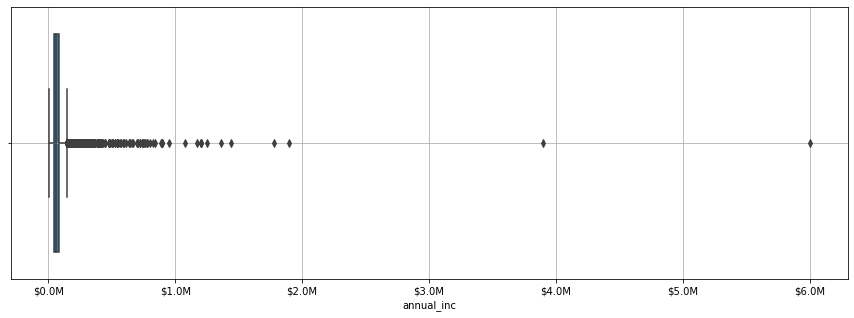

In [207]:
#Plotting Annucal Income with default rate
plt.figure(figsize=(15, 5))
ax = sns.boxplot(x=df_master_loan['annual_inc'], data=df_master_loan)
ax.grid(True)
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${}'.format(x/1000000) + 'M'))
plt.show()

From the descirbe and the box plot 

1. Median is 60,000.00.
2. Most of the people have income less than $1 million.

Clearly, there are some outliers. We are going to get rid of them. We will keep only -3sigma to +3 sigma for our analysis. Then we create dervied metrics which would help in clear grading of the income.

In [208]:
df_master_loan = df_master_loan[
    np.abs(df_master_loan.annual_inc-df_master_loan.annual_inc.mean()) <= (3*df_master_loan.annual_inc.std())]

In [209]:
def income_grade(n):
    if n <= 40000:
        return 'Low'
    elif n > 40000 and n <=100000:
        return 'Medium'
    elif n > 100000 and n <=150000:
        return 'High'
    else:
        return 'Very High'

In [210]:
df_master_loan['income_grade'] = df_master_loan.annual_inc.apply(lambda x: income_grade(x))

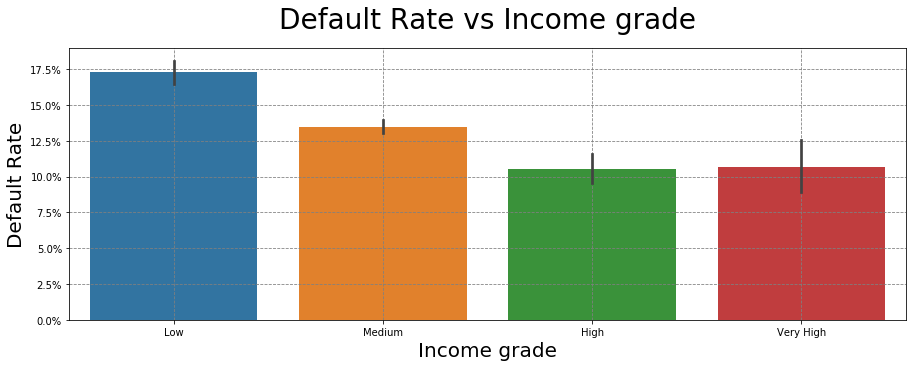

In [211]:
mybar("income_grade",
     "Default Rate vs Income grade",
     "Income grade",
      "Default Rate"  
     )
plt.show()

<b>Observation</b>:<br>
It's clearly observed that as the Income grade is increasing the default rate is decreasing.Company must be extra cautious while granting to Low income individiuals as there is good probability of of default. Let's find the probability of default in low income individuals.

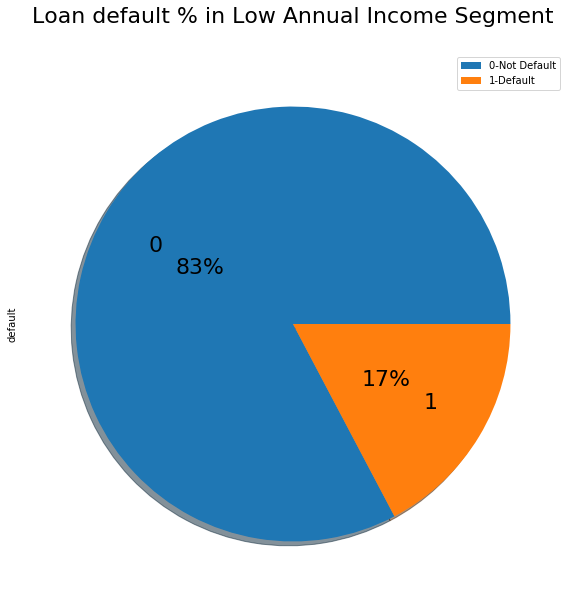

In [212]:
mypie(df_master_loan[df_master_loan['income_grade'] == "Low"],"Loan default % in Low Annual Income Segment\n")
plt.show()

In a Low income range there is <b>17%</b> chance that an applicant would default on his Loan. So <b>Annual Income</b> is a strong Indicator of default.

Analyzing Variable - <b>emplength</b>

In [213]:
# We have created a derived metric for emplength with the columname emp_exp
df_master_loan.emp_exp.describe()

count   35,122.00
mean         5.09
std          3.39
min          1.00
25%          2.00
50%          4.00
75%          9.00
max         10.00
Name: emp_exp, dtype: float64

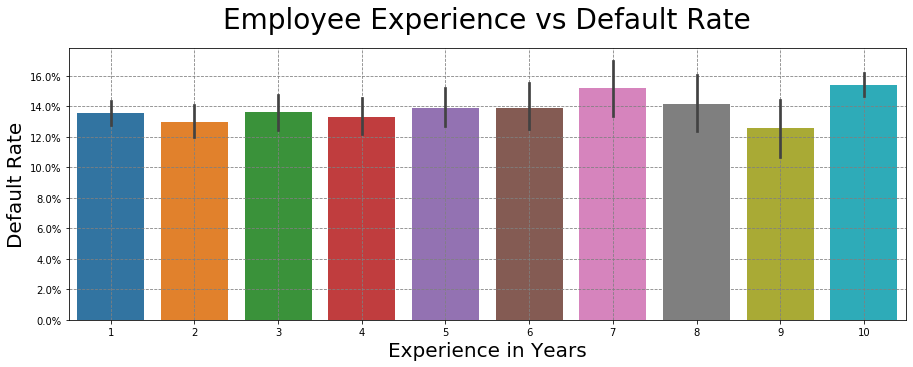

In [214]:
mybar("emp_exp","Employee Experience vs Default Rate","Experience in Years","Default Rate")
plt.show()

We are unable derive clear insights from the above plot , so we will be going with binning.

In [215]:
def emp_exp(n):
    if n <= 2:
        return '0-2' #0-25%
    elif n > 2 and n <=4: #25-50%
        return '2-4'
    elif n > 4 and n <=9:#50-75%
        return '4-9'
    else:
        return '9+'#>75%
df_master_loan['emp_length_bin'] = df_master_loan['emp_exp'].apply(lambda x: emp_exp(x))
df_master_loan['emp_length_bin'].value_counts()

0-2    10962
4-9     9224
9+      7939
2-4     6997
Name: emp_length_bin, dtype: int64

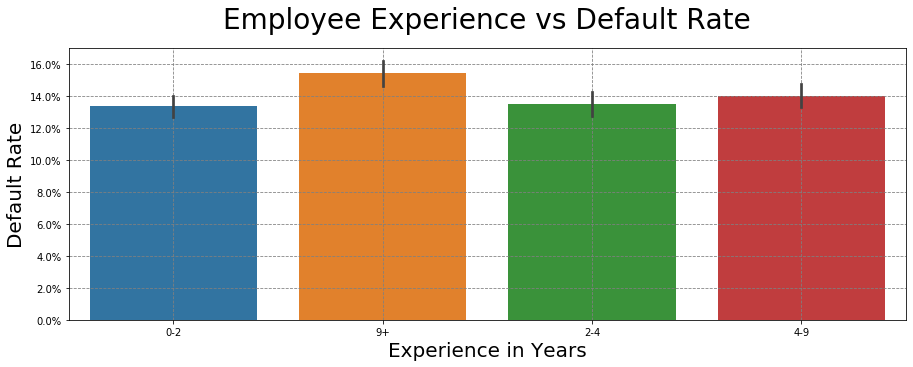

In [216]:
mybar("emp_length_bin","Employee Experience vs Default Rate","Experience in Years","Default Rate")
plt.show()

<b>Observation</b>:<br>
Applicants with 9+ years experience are more likely to default than others.

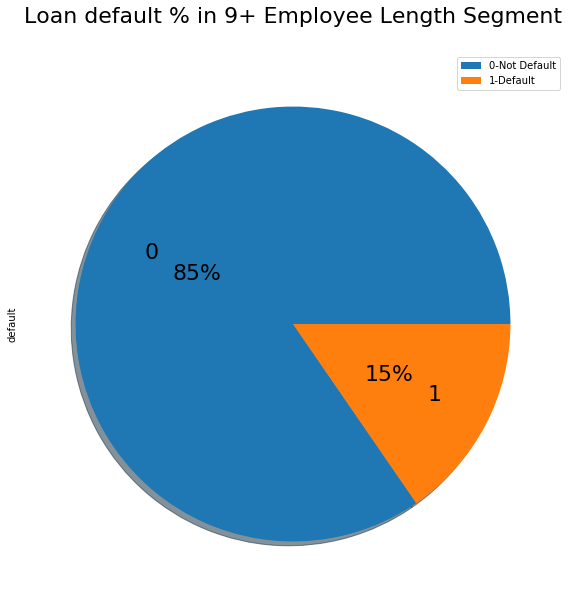

In [217]:
mypie(df_master_loan[df_master_loan['emp_length_bin'] == '9+'],"Loan default % in 9+ Employee Length Segment\n")
plt.show()

It's observed that 15% of all Applicants in 9+ Employee lenght Category are likely to default on a Loan.

Analyzing Variable - <b>int_rate</b>

In [218]:
df_master_loan.int_rate.describe()

count   35,122.00
mean        11.97
std          3.70
min          5.42
25%          8.94
50%         11.83
75%         14.46
max         24.40
Name: int_rate, dtype: float64

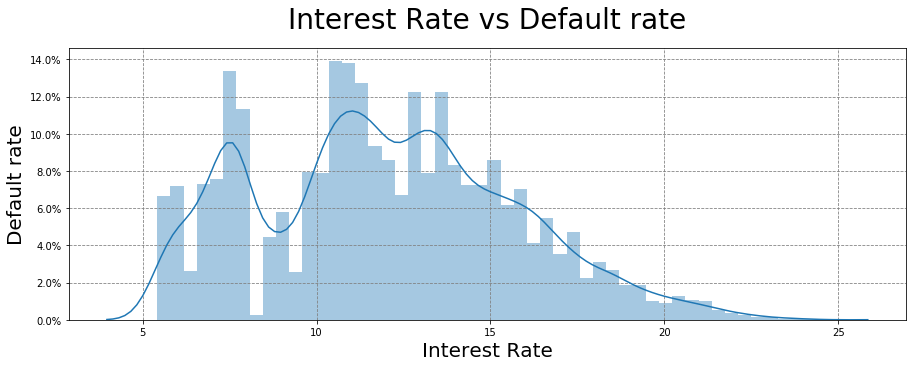

In [219]:
#Distribution if interest rate
mydist(df_master_loan,"int_rate","Interest Rate vs Default rate","Interest Rate","Default rate")
plt.show()

In [220]:
# distributing int_rate into relevant bins
def int_rate(n):
    if n <= 9:#25%
        return 'Low'
    elif n > 9 and n <=15:#25 -75%
        return 'Medium'
    else:
        return 'High'#>75%
    
df_master_loan['int_rate_bin'] = df_master_loan['int_rate'].apply(lambda x: int_rate(x))

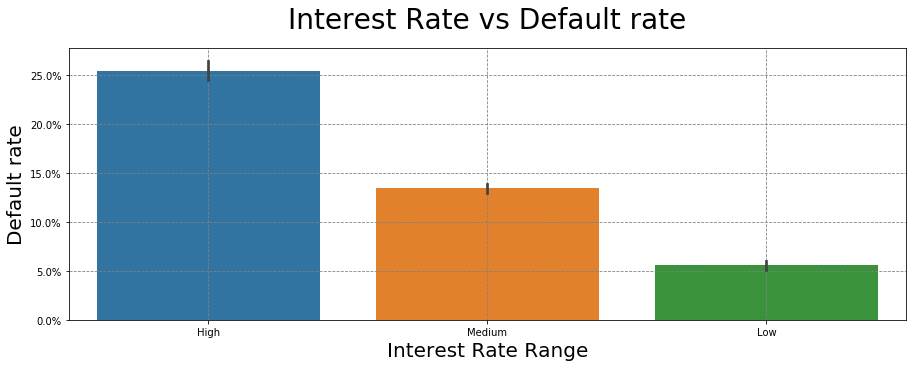

In [221]:
mybar("int_rate_bin","Interest Rate vs Default rate","Interest Rate Range","Default rate")
plt.show()

<b>Observartion</b>:<br>
It's observed that as interest rate is increasing ,default rate increases.<br>
Applicants with High Interest Rates(i.e. >15% in our case) have high rates of default.

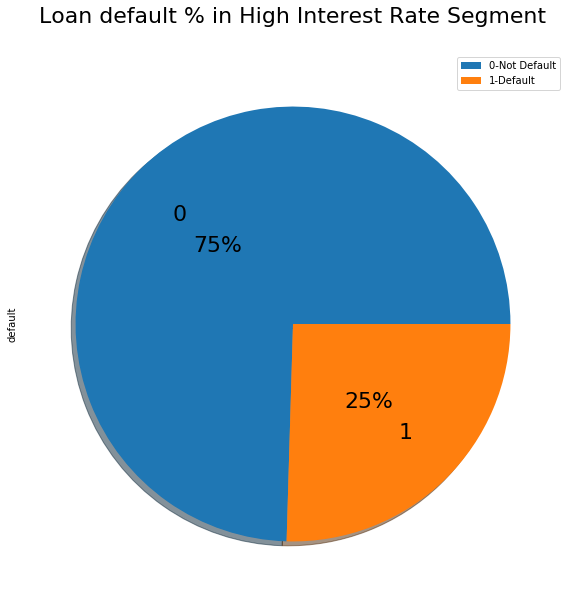

In [222]:
mypie(df_master_loan[df_master_loan['int_rate_bin'] == 'High'],"Loan default % in High Interest Rate Segment\n")
plt.show()

25% of Applicants in High interest range likely to default on the loan. So, <b>Interest Rate</b> is a strong indicator of default.

Analyzing Variable - <b>term</b>

In [223]:
df_master_loan.term.describe()

count   35,122.00
mean        42.09
std         10.44
min         36.00
25%         36.00
50%         36.00
75%         60.00
max         60.00
Name: term, dtype: float64

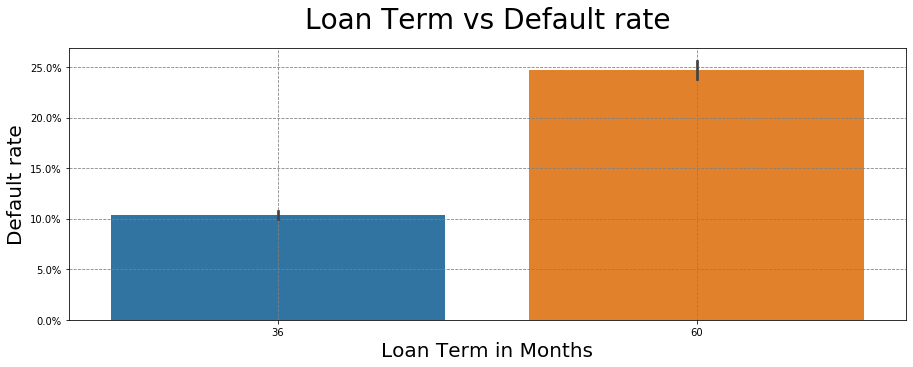

In [224]:
mybar("term","Loan Term vs Default rate","Loan Term in Months","Default rate")
plt.show()

<b>Observartion</b>:<br>
Applicants with higher loan Term 60 months have high default rate.

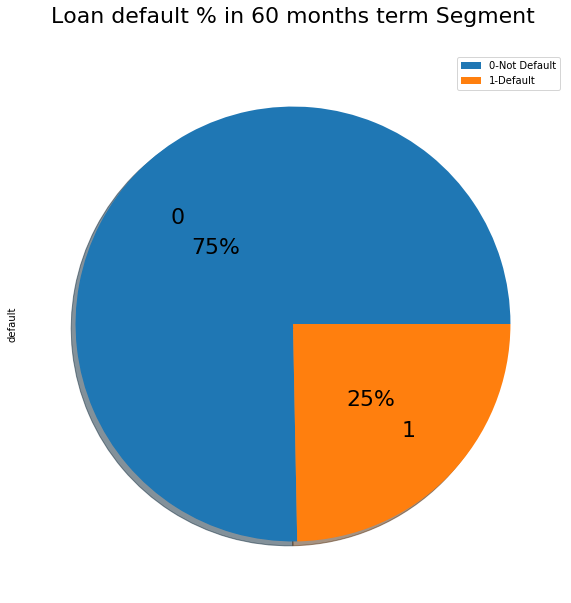

In [225]:
mypie(df_master_loan[df_master_loan['term'] == 60],"Loan default % in 60 months term Segment\n")
plt.show()

Among all the applicants with term 60 months ,25% of the are likely to default on the loan. So, <b>Loan Term</b> is a Strong Indicator of default

Analyzing variable - <b>Sub-Grade</b>

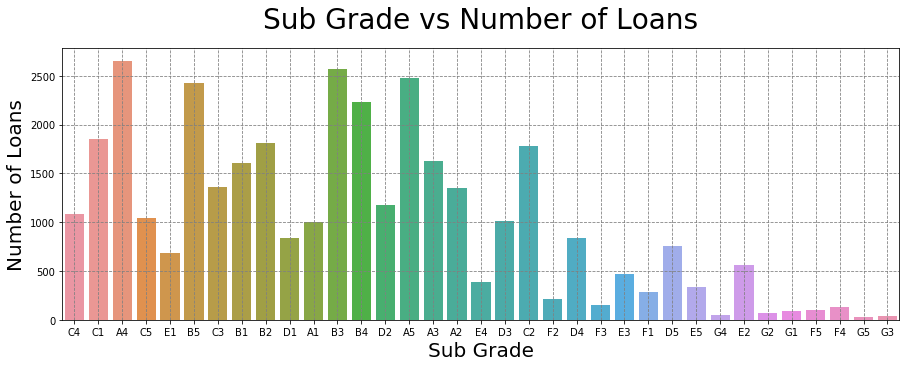

In [226]:
mycountplot("sub_grade","Sub Grade vs Number of Loans","Sub Grade","Number of Loans")
plt.show()

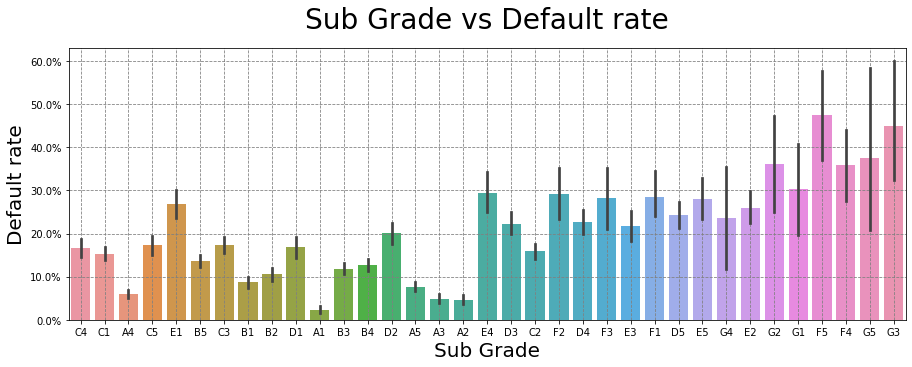

In [227]:
ax = mybar("sub_grade","Sub Grade vs Default rate","Sub Grade","Default rate")
plt.show()

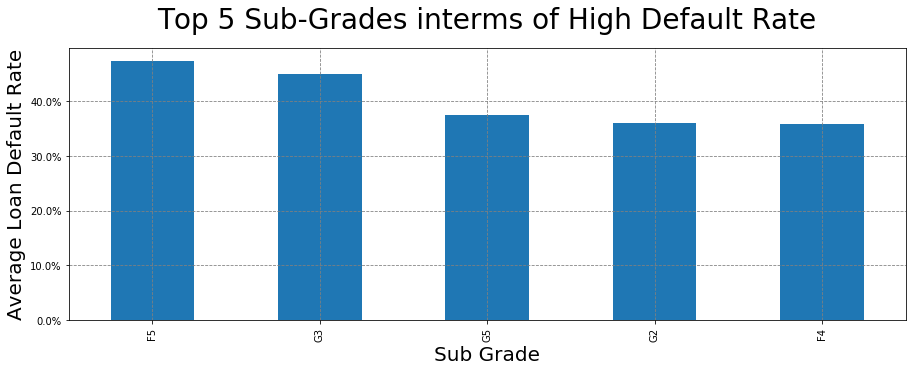

In [228]:
plt.figure(figsize=(15, 5))
ax = df_master_loan.groupby("sub_grade").default.mean().nlargest().plot.bar()
plt.title("Top 5 Sub-Grades interms of High Default Rate",fontsize=28).set_position([.5, 1.05])
ax.set_ylabel("Average Loan Default Rate",fontsize=20)
ax.set_xlabel("Sub Grade",fontsize=20)
plt.grid(color='gray', linestyle='dashed')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(round(x*100,2)) + '%'))
plt.show()

Assumption: Grading starts from A1 and it's the best sub grade.<br>
<b>Observation</b>:<br>
As the grading is going down there is evidence of increase in default rates especially in the least grades.
Lending club must be extra cautious while lending money to Applicants from grades F5,G3,G5,G2,F4 as they have high chance of default.<br>
Default Rate in Grade F5 = 47%<br>
Default Rate in Grade G3 = 45%<br>
Default Rate in Grade G5 = 38%<br>
Default Rate in Grade G2 = 36%<br>
Default Rate in Grade F4 = 36%<br>

So, <b>Sub Grade</b> is a Strong Indicator of default.

Analyzing Varaible - <b>home_ownership</b>

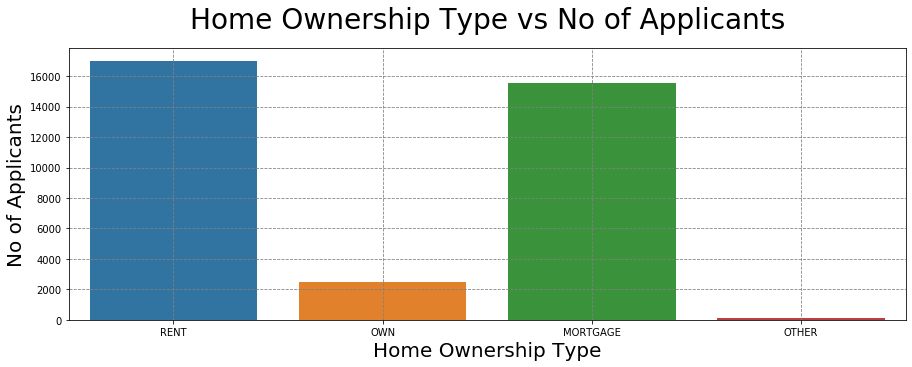

In [229]:
mycountplot("home_ownership","Home Ownership Type vs No of Applicants","Home Ownership Type","No of Applicants")
plt.show()

We observe that Rent and Mortgage types are very high.

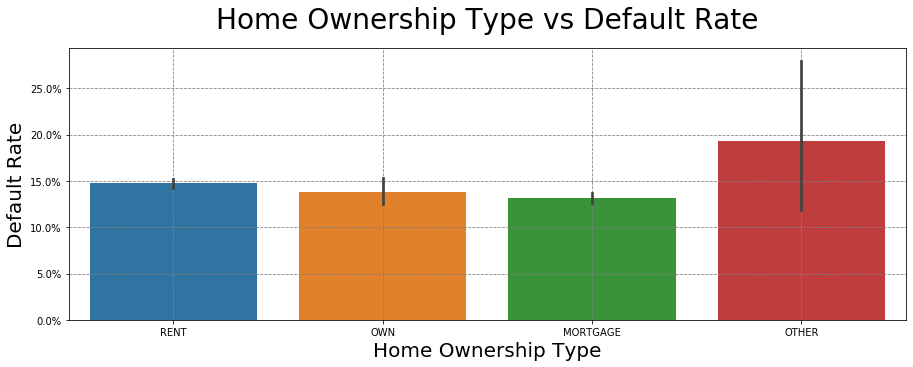

In [230]:
mybar("home_ownership","Home Ownership Type vs Default Rate","Home Ownership Type","Default Rate")
plt.show()

<b>Observation</b>:<br>
Applicants with Home Ownership Type "Other" have 19% chance of defaulting on a loan. 

Note:
As found in the previous step Home Owners who come into category "Other" are very Less.

Applicants with Home Ownership Type "Rent" have 15% chance of defaulting on a loan.<br> 
Applicants with Home Ownership Type "Own"  have 14% chance of defaulting on a loan.<br>
Applicants with Home Ownership Type "Mortgage"  have 13% chance of defaulting on a loan.<br>

Analyzing Varaible - <b>purpose</b>

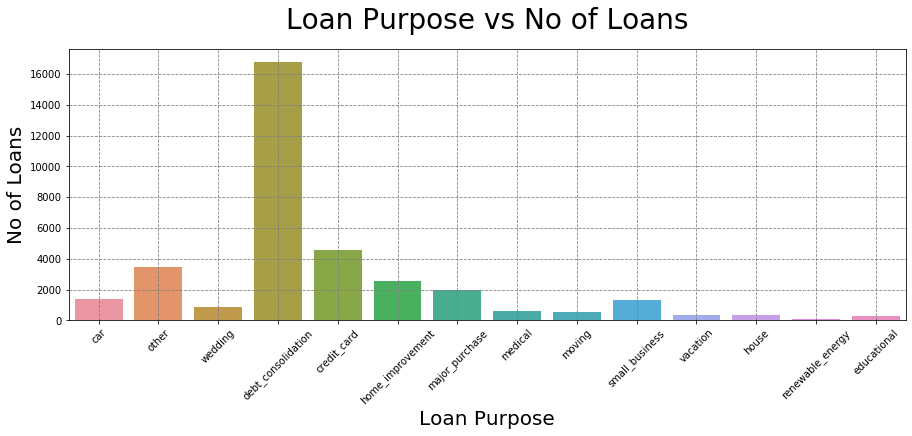

In [231]:
mycountplot("purpose","Loan Purpose vs No of Loans","Loan Purpose","No of Loans")
plt.xticks(rotation=45)
plt.show()

Top 5 loan purposes are :<br>
debt_consolidation   <br> 
credit_card            <br>
other                  <br>
home_improvement       <br>
major_purchase         <br>

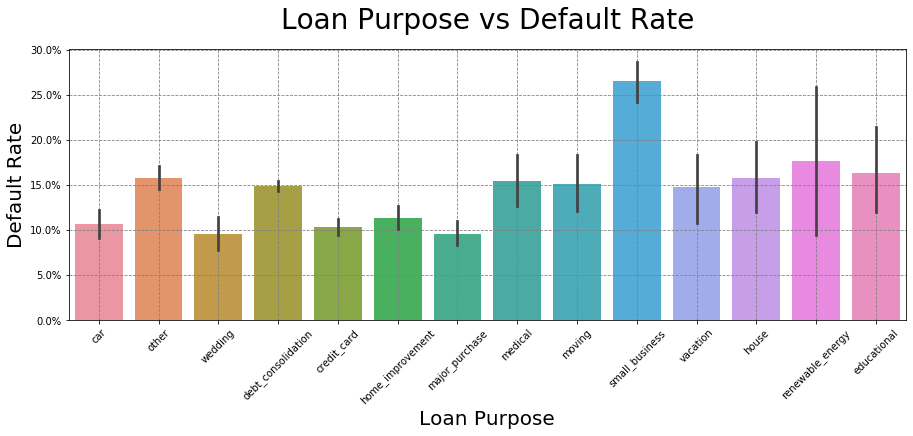

In [232]:
mybar("purpose","Loan Purpose vs Default Rate","Loan Purpose","Default Rate")
plt.xticks(rotation=45)
plt.show()

<b>Observation</b>:<br>
Loans with Loan Purpose small_business have high chance of default.

Note: Loan Type small_business is Low when compared with Other Loan Types.

Default Rates of Top 5 Loan Types are <br>
debt_consolidation  - 15%<br>
credit_card         - 10%<br>
other               - 16%<br>
home_improvement    - 11%<br>
major_purchase      - 10%<br>

Analyzing variable - <b>dti</b>

In [233]:
df_master_loan.dti.describe()

count   35,122.00
mean        13.45
std          6.62
min          0.00
25%          8.38
50%         13.55
75%         18.68
max         29.99
Name: dti, dtype: float64

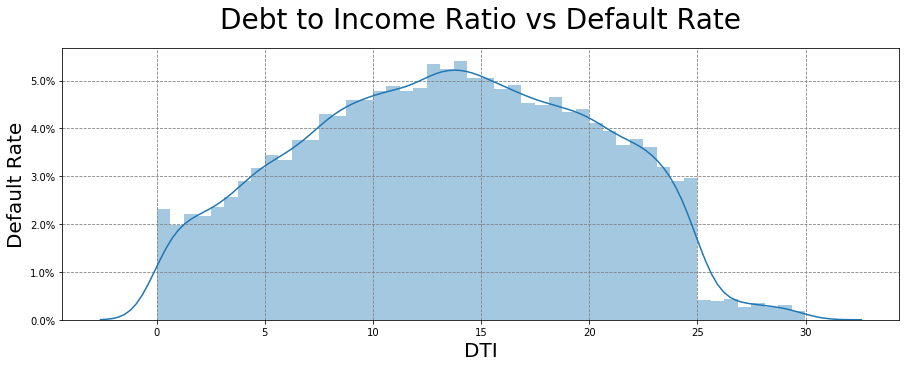

In [234]:
mydist(df_master_loan,"dti","Debt to Income Ratio vs Default Rate","DTI","Default Rate")
plt.show()

We see that the range of dti is from 0-30 and the average dti being at 13.45

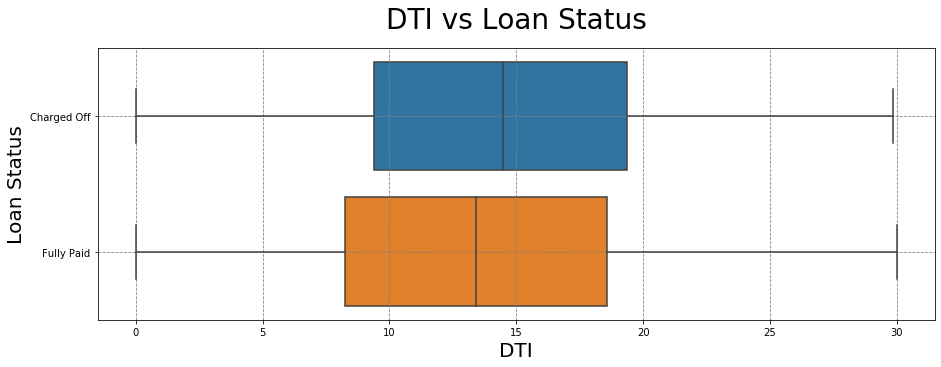

In [235]:
myboxplot(
    "dti",
    "DTI vs Loan Status",
    "DTI",
    "Loan Status"
)
plt.show()

We can clearly see that the fully paid loans have lower dti than charged off loans

In [236]:
# debt to income ratio
def dti_range(n):
    if n <= 10:
        return 'Low'
    elif n > 10 and n <=20:
        return 'Medium'
    else:
        return 'High'
    

df_master_loan['dti_range'] = df_master_loan['dti'].apply(lambda x: dti_range(x))

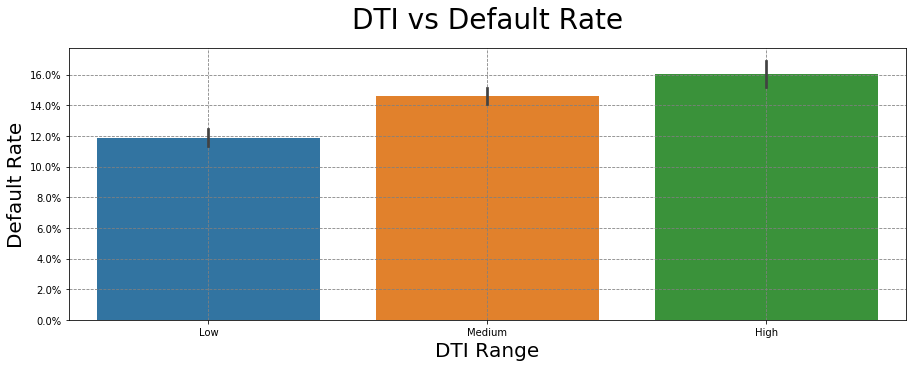

In [237]:
mybar("dti_range",
     "DTI vs Default Rate",
     "DTI Range",
      "Default Rate"  
     )
plt.show()

__Observation:__
<br> We can clearly see that the fully paid loans have lower dti than charged off loans.
<br>We can clearly see that as the DTI increases the default rate increases.
<br> About __16%__ of the applicants with high DTI default.
So, <b>DTI</b> is a strong indicator of default.

Analysing - __Verification Status__

In [238]:
#Verification_status
df_master_loan.verification_status.describe()

count            35122
unique               3
top       Not Verified
freq             14783
Name: verification_status, dtype: object

In [239]:
df_master_loan.verification_status.value_counts()

Not Verified       14783
Verified           11251
Source Verified     9088
Name: verification_status, dtype: int64

In [240]:
# Converting verification_status into numerical for analysis
def verification_status(status):
    if status == 'not verified':
        return 1
    elif status == 'verified':
        return 2
    else:
        return 3
    
df_master_loan['verification_status_num'] = df_master_loan['verification_status'].apply(lambda x: verification_status(x.lower()))

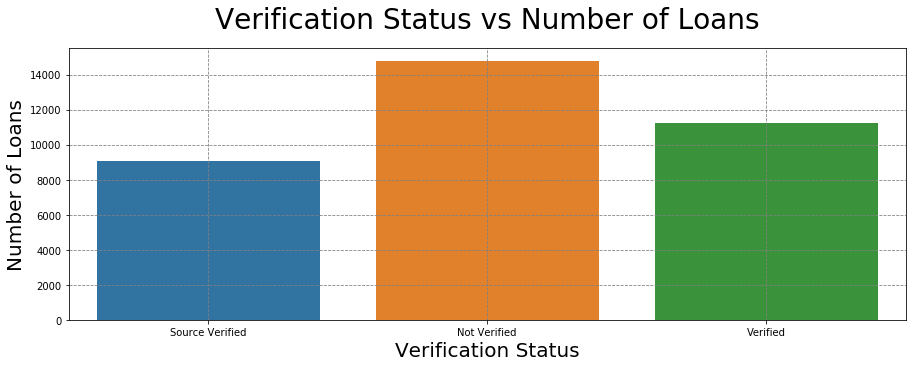

In [241]:
mycountplot(
    "verification_status",
    "Verification Status vs Number of Loans",
    "Verification Status",
    "Number of Loans"
)
plt.show()

We can see that the number of not verified loans are significanlty higher than verified and source verified

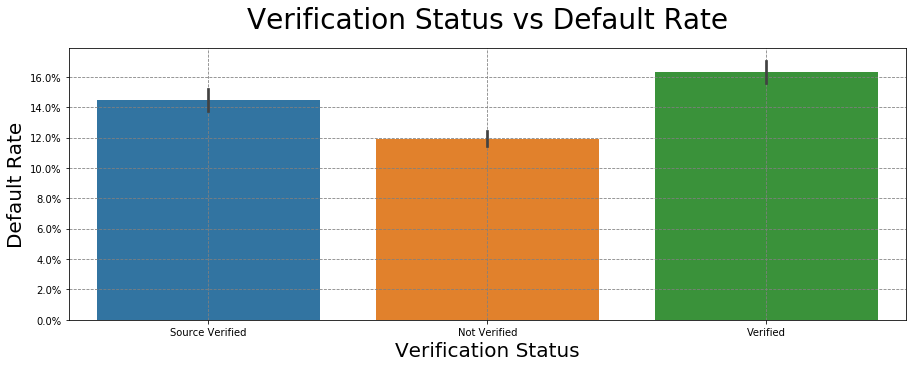

In [242]:
mybar("verification_status",
     "Verification Status vs Default Rate",
     "Verification Status",
      "Default Rate"  
     )
plt.show()

__Observation:__
<br>We can see that despite the not verified loans were more, we are seeing loans with verified verification status being defaulted. So, even the verified cases are prone to default.
Lending Club needs to review the verification process and add more checks into the verification process.
<br> About __17%__ of the total loans with verification status as verified

Analysing - __Grade__

In [243]:
# grade
df_master_loan.grade.describe()

count     35122
unique        7
top           B
freq      10654
Name: grade, dtype: object

In [244]:
df_master_loan.grade.value_counts()

B    10654
A     9106
C     7128
D     4631
E     2442
F      888
G      273
Name: grade, dtype: int64

We can see that majority of the loans are provided to A, B and C grade applicants

In [245]:
df_master_loan.sort_values(by=["grade"], inplace=True)

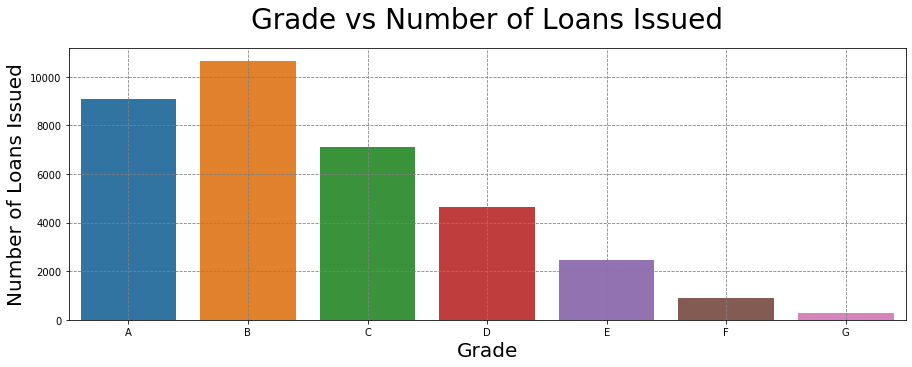

In [246]:
mycountplot(
    "grade",
    "Grade vs Number of Loans Issued",
    "Grade",
    "Number of Loans Issued"
)
plt.show()

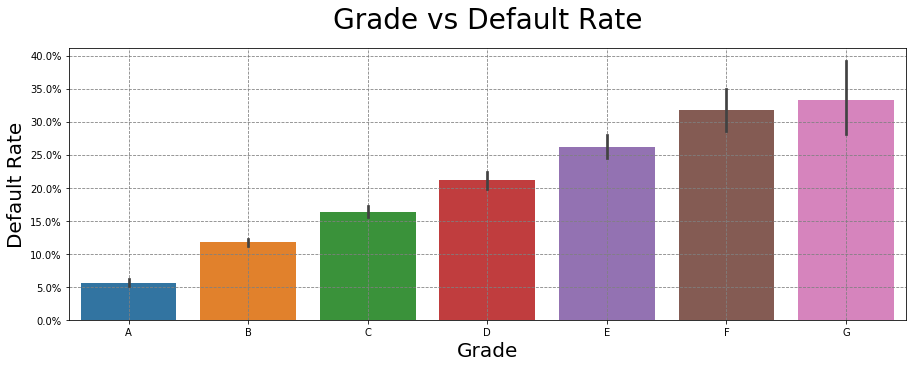

In [247]:
mybar("grade",
     "Grade vs Default Rate",
     "Grade",
      "Default Rate"  
     )
plt.show()

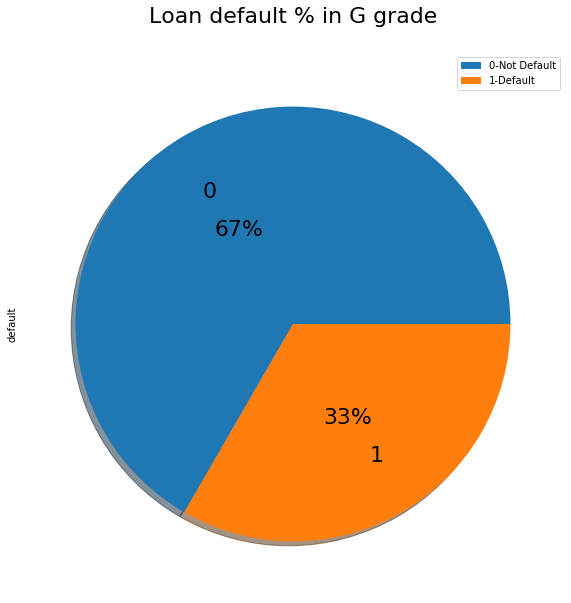

In [248]:
mypie(df_master_loan[df_master_loan['grade'] == 'G'],"Loan default % in G grade\n")
plt.show()

__Observations:__
<br>We can cleary see that as we go from grade A to G, the default rate increases dramatically.
<br>From __grade E__ onwards, __more than 25% of the loans__ have defaulted
<br>For __grade G__, the default rate is as high as __33%__<br>
So, <b>Grade</b> is a strong indicator of default.

Analysing - __funded_amnt_inv__

In [249]:
#funded_amnt_inv
df_master_loan.funded_amnt_inv.describe()

count   35,122.00
mean    10,374.31
std      6,915.79
min          0.00
25%      5,000.00
50%      9,000.00
75%     14,150.00
max     35,000.00
Name: funded_amnt_inv, dtype: float64

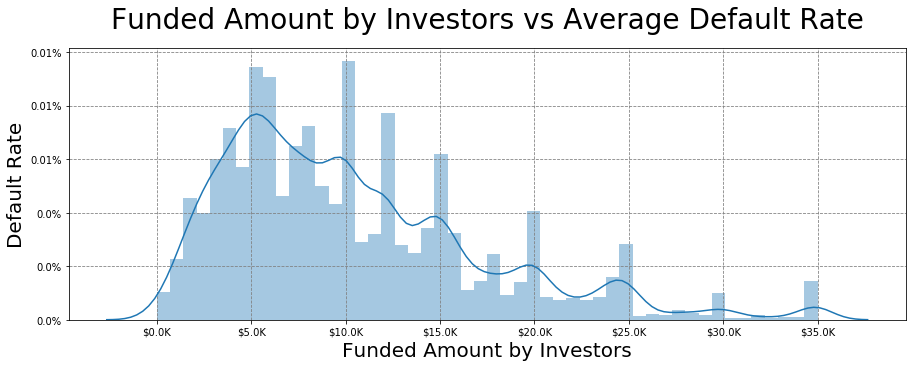

In [250]:
#sns.distplot(df_master_loan['funded_amnt_inv'])
ax = mydist(df_master_loan,"funded_amnt_inv",
                      "Funded Amount by Investors vs Average Default Rate",
                      "Funded Amount by Investors",
                      "Default Rate")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '${}'.format(x/1000) + 'K'))
plt.show()

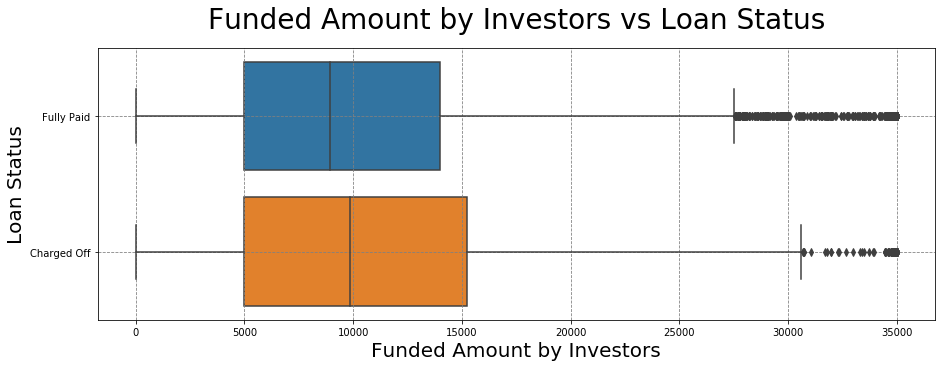

In [251]:
myboxplot(
    "funded_amnt_inv",
    "Funded Amount by Investors vs Loan Status",
    "Funded Amount by Investors",
    "Loan Status"
)
plt.show()

We can see that the range of funded amount by investors is anywhere from 0 to 35000 and the average being at 10375.
<br>Also, we can analyse the funded amount by investors better by trying to understand what where is the maxiumum funding happening and what is the charged off count.<br>
Note: We are not clearing the outliers as they are in significant number. Alternatively we are categorizing them in the below binning logic for analysis.

In [252]:
# distributing funded_amount_inv into relevant bins
def funded_amnt_inv(amt):
    if amt < 5000:
        return 'Low'
    elif amt >=5000 and amt < 15000:
        return 'Medium'
    elif amt >= 15000 and amt < 25000:
        return 'High'
    else:
        return 'Very High'
        
df_master_loan['funded_amnt_inv_range'] = df_master_loan['funded_amnt_inv'].apply(lambda x: funded_amnt_inv(x))

In [253]:
df_master_loan.funded_amnt_inv_range.value_counts()

Medium       19634
Low           7989
High          6286
Very High     1213
Name: funded_amnt_inv_range, dtype: int64

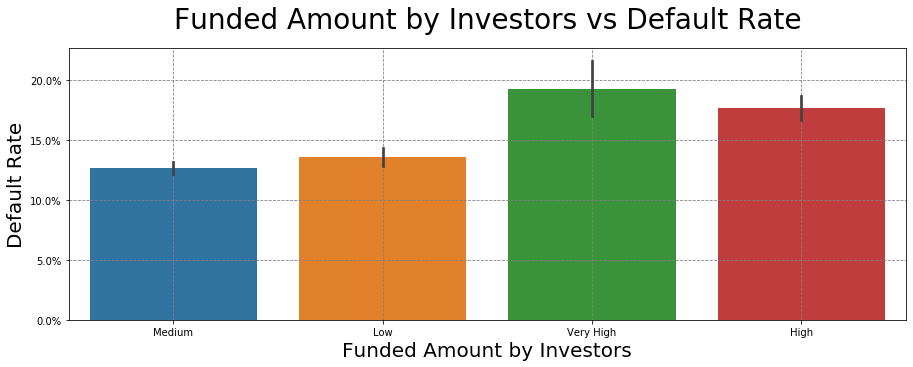

In [254]:
mybar("funded_amnt_inv_range",
     "Funded Amount by Investors vs Default Rate",
     "Funded Amount by Investors",
      "Default Rate"  
     )
plt.show()

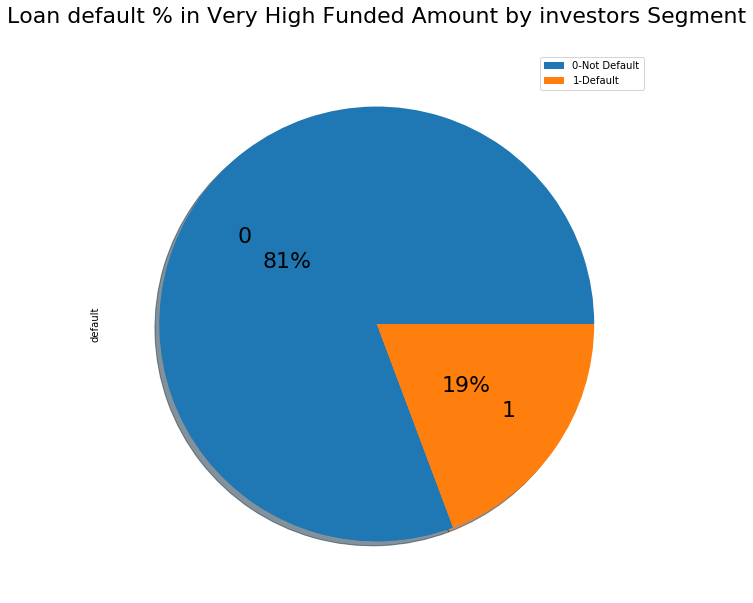

In [255]:
mypie(df_master_loan[df_master_loan['funded_amnt_inv_range'] == 'Very High'],
      "Loan default % in Very High Funded Amount by investors Segment\n")
plt.show()

__Observations:__
<br> We can also see majority of the funded amount by investors is from 5000 to 15000 and there are few higher value loans also.
<br>We can see that as the funding amount by investors increase the charged off loans also increase. 
<br> For funding amount in very high range, the default rate is __19%__
<br>So, investors need to be very careful with lending high and very high amounts.<br>
So, <b>Funded Amount Inv</b> is a strong indicator of default.

Analyzing - __installment__

In [256]:
#installment
df_master_loan.installment.describe()

count   35,122.00
mean       322.33
std        205.34
min         16.08
25%        167.71
50%        279.76
75%        424.61
max      1,305.19
Name: installment, dtype: float64

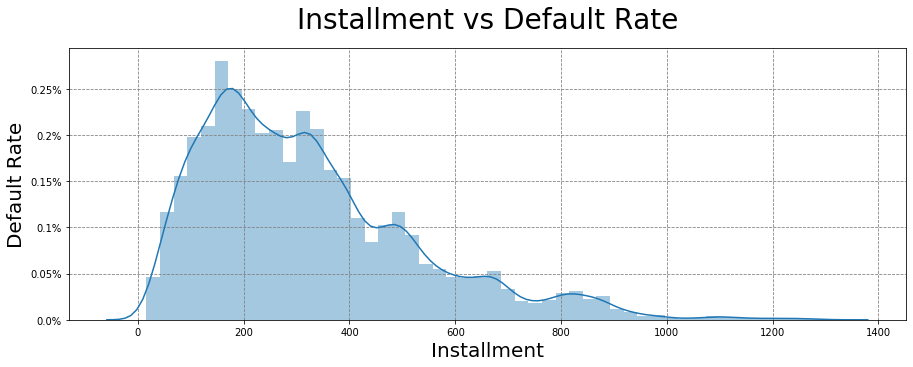

In [257]:
mydist(df_master_loan,"installment","Installment vs Default Rate","Installment","Default Rate")
plt.show()

We can see that the installment ranges from \\$16 to \\$1305 while the average installment amount is \\$322

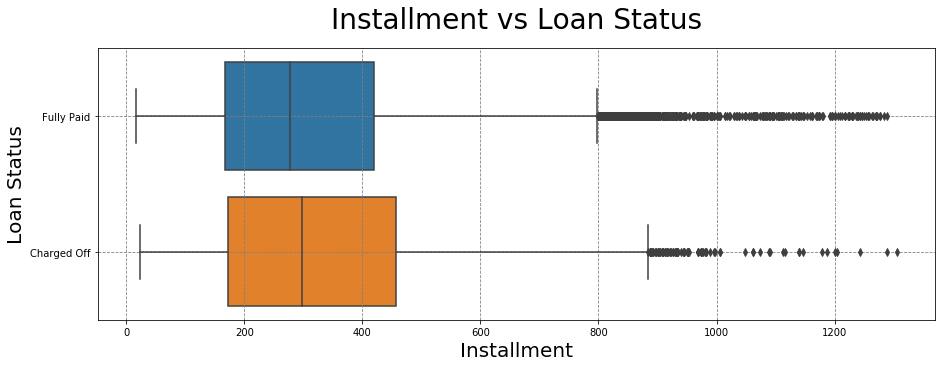

In [258]:
myboxplot(
    "installment",
    "Installment vs Loan Status",
    "Installment",
    "Loan Status"
)
plt.show()

In [259]:
# distributing installment into relevant bins
def installment(amt):
    if amt <= 200:
        return 'Low'
    elif amt > 200 and amt<=400:
        return 'Medium'
    elif amt > 400 and amt <=600:
        return 'High'
    else:
        return 'Very High'
    
df_master_loan['installment_range'] = df_master_loan['installment'].apply(lambda x: installment(x))

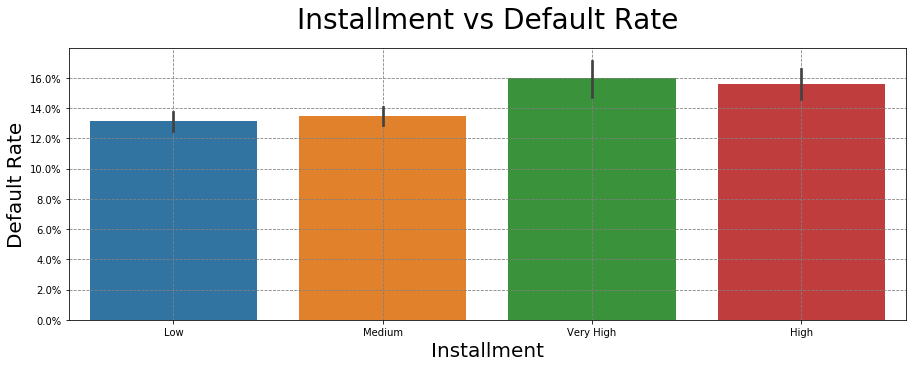

In [260]:
mybar("installment_range",
     "Installment vs Default Rate",
     "Installment",
      "Default Rate"  
     )
plt.show()

__Observations:__
<br>We can clearly see that as the installment amount increases, the default rate also increase. 
<br> For the high and very high levels of installment, the default rate is __>15%__
<br>Hence, investors need to make sure they lend at the right installment amount.
So, __Installment__ is a strong Indicator of default.

In [261]:
#issue_d
# from issue_d, we have already extracted the issue month and the year

In [262]:
# issue_month
df_master_loan.groupby('issue_month').issue_month.count()

issue_month
1     2031
2     2008
3     2378
4     2653
5     2724
6     2953
7     3097
8     3174
9     3248
10    3405
11    3657
12    3794
Name: issue_month, dtype: int64

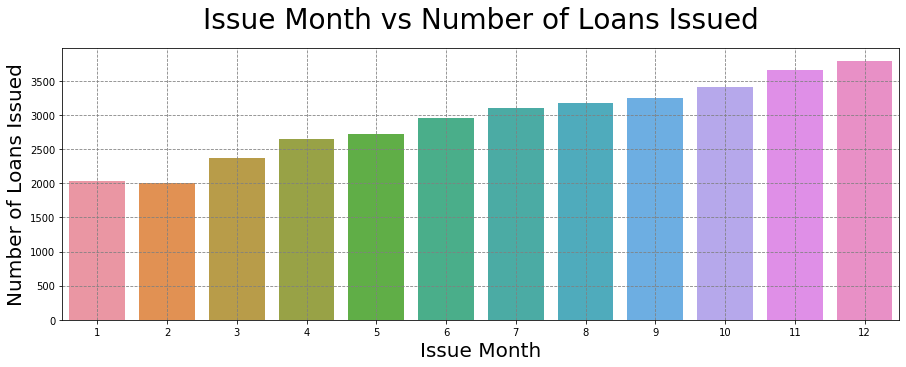

In [263]:
# number of loans issues per month
mycountplot(
    "issue_month",
    "Issue Month vs Number of Loans Issued",
    "Issue Month",
    "Number of Loans Issued"
)
plt.show()

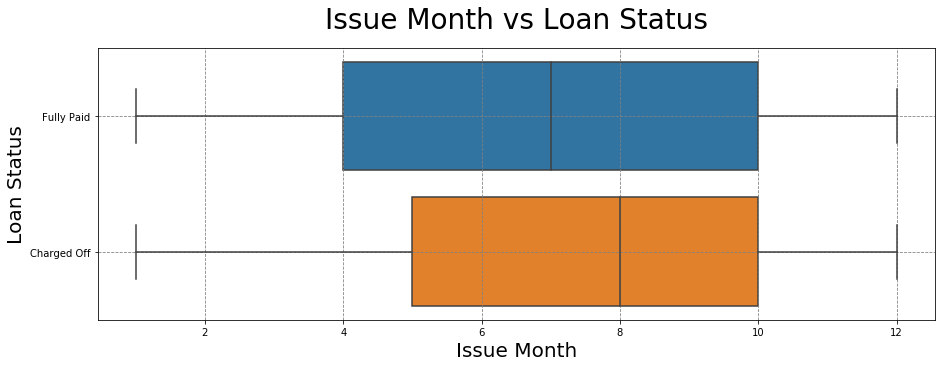

In [264]:
myboxplot(
    "issue_month",
    "Issue Month vs Loan Status",
    "Issue Month",
    "Loan Status"
)
plt.show()

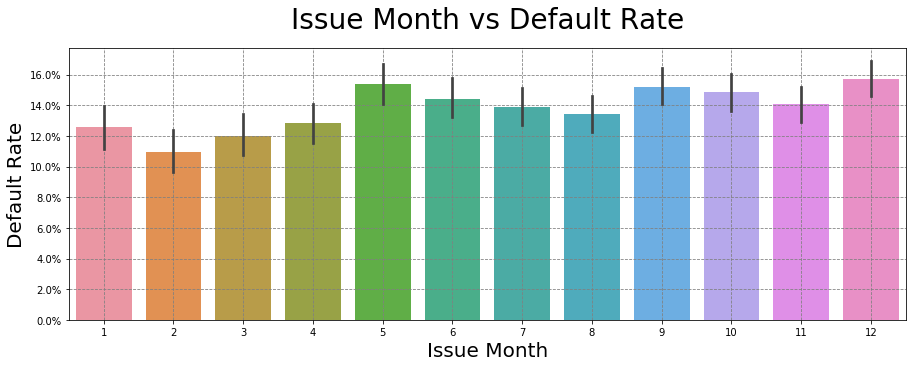

In [265]:
mybar("issue_month",
     "Issue Month vs Default Rate",
     "Issue Month",
      "Default Rate"  
     )
plt.show()

__Observations:__
<br>We can see that the number of loans issued tend to increase towards the end of the year in the month from 9 to 12.
<br> Also, default rate is high in 9-12 month period. For these months, the default rates have been __>14%__.
This would mostly due to holiday season in these months.
<b>issue_month</b> is strong indicator of default and investors must be causious in lending during 9-12 month period.

In [266]:
df_master_loan.groupby('issue_year').issue_year.count()

issue_year
2007        6
2008     1051
2009     4391
2010    10711
2011    18963
Name: issue_year, dtype: int64

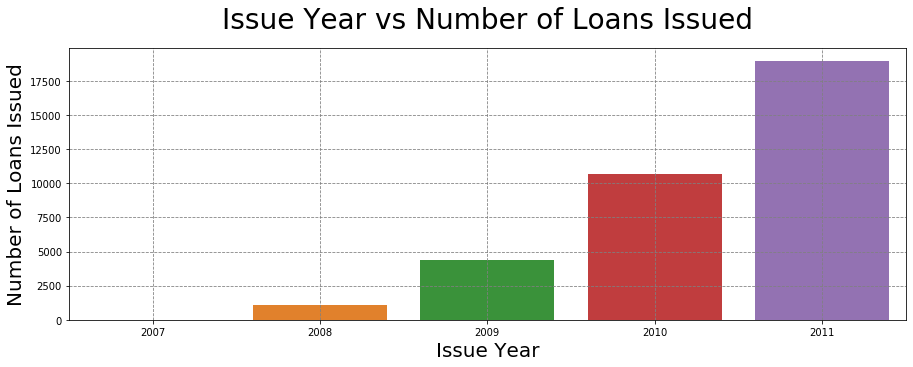

In [267]:
mycountplot(
    "issue_year",
    "Issue Year vs Number of Loans Issued",
    "Issue Year",
    "Number of Loans Issued"
)
plt.show()

We have seen significant rise in the number of loans issued from 2007 to 2011 

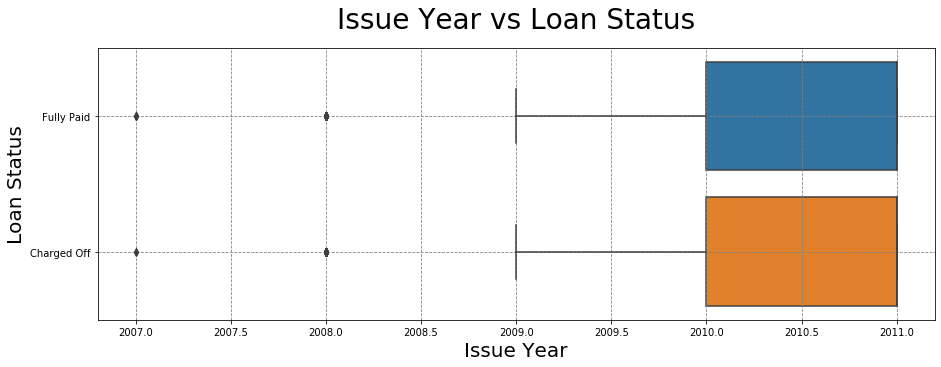

In [268]:
myboxplot(
    "issue_year",
    "Issue Year vs Loan Status",
    "Issue Year",
    "Loan Status"
)
plt.show()

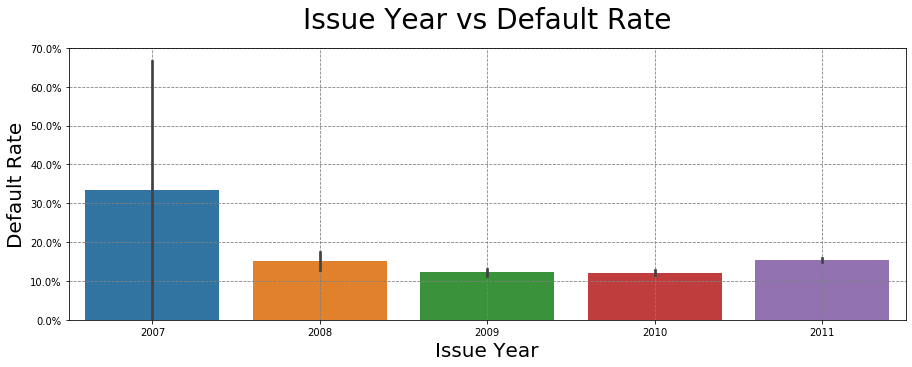

In [269]:
mybar("issue_year",
     "Issue Year vs Default Rate",
     "Issue Year",
      "Default Rate"  
     )
plt.show()

__Observations:__
<br> We can ignore 2007 numbers as there are very few loans issues.
<br>We can see that the number of charged off cases were high in 2008 but fell in 2009 and 2010. But it again started to rise in 2011. 
<br> We dont see a significant pattern here for our analysis of defaulting on loan.

Lets see, How different varaibles in Combinations behave with default rate.

Filtering dataframe w.r.t to top 5 loan purposes in terms of Loan count,So that We can have perform segmented analysis.

In [270]:
top5_loan_purposes = df_master_loan.purpose.value_counts().nlargest().index.to_list()
top5_loan_purposes

['debt_consolidation',
 'credit_card',
 'other',
 'home_improvement',
 'major_purchase']

In [271]:
df_master_loan_top5purp = df_master_loan[df_master_loan['purpose'].isin(top5_loan_purposes)]
df_master_loan_top5purp['purpose'].value_counts()

debt_consolidation    16821
credit_card            4598
other                  3443
home_improvement       2559
major_purchase         1960
Name: purpose, dtype: int64

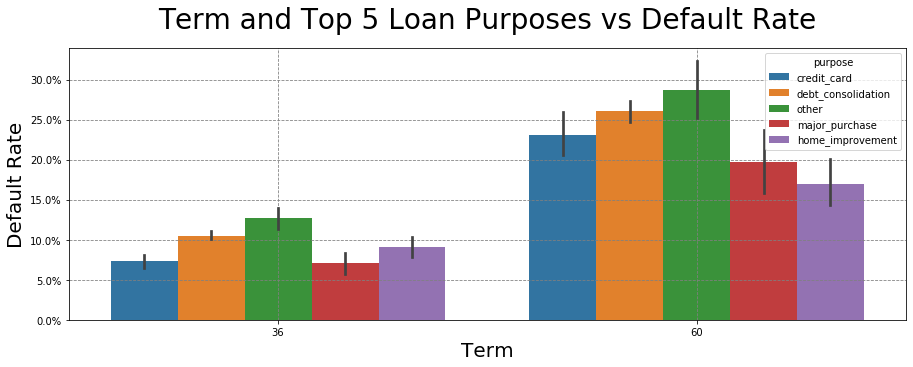

In [272]:
mybarstacked(df_master_loan_top5purp,"term","purpose","Term and Top 5 Loan Purposes vs Default Rate",
             "Term",
             "Default Rate")

<b>Observation</b>:<br>
In Loan Term 60 months "Other" Category has with a default rate of 29%.

Filtereing data w.r.t to top5 Sub Grades in terms of default rate for analysis.

In [273]:
top5_sub_grades = df_master_loan.groupby("sub_grade").default.mean().nlargest().index.to_list()
df_master_loan_top5subgrade = df_master_loan[df_master_loan['sub_grade'].isin(top5_sub_grades)]

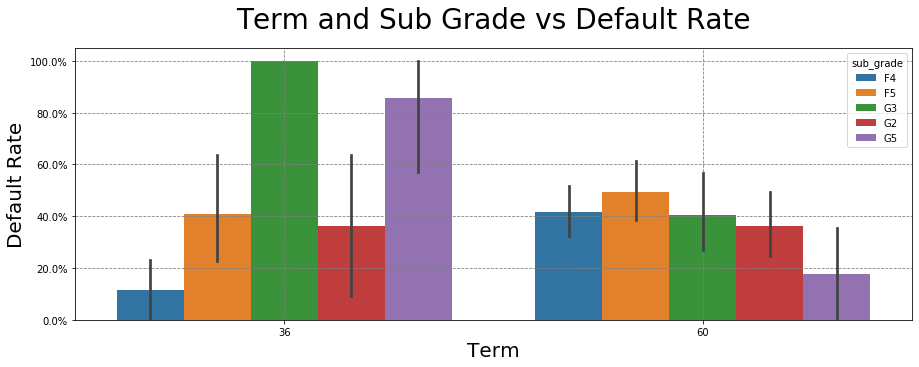

In [274]:
mybarstacked(df_master_loan_top5subgrade,"term","sub_grade","Term and Sub Grade vs Default Rate","Term","Default Rate")

<b>Observation</b>:<br>

In Loan term 36 months we can see that following Sub Grades have high chance of default.<br>
G3 - 100% <br>
G5 - 86% <br>
Note:
The No of Applicants who match the above criteria are very Low in the current data. We need more data to gain more confidence on this observation.

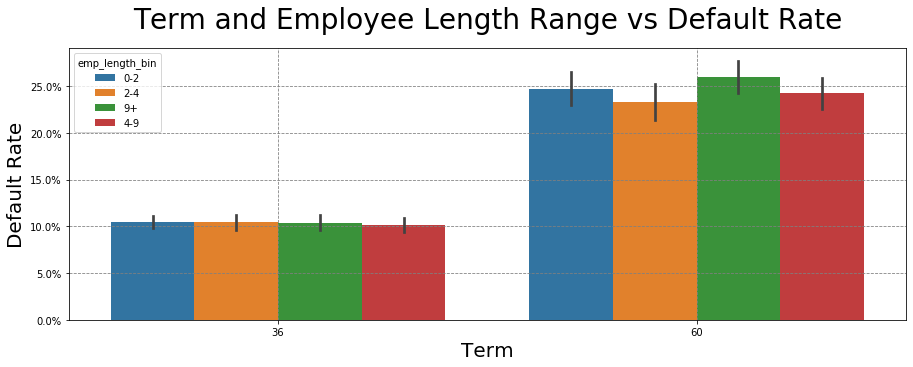

In [275]:
mybarstacked(df_master_loan,"term","emp_length_bin","Term and Employee Length Range vs Default Rate","Term","Default Rate")

<b>Observation</b>:<br>

In Loan Term 60 months , Employee Length doens't seem to have effect as default rate is approxmiately similar all the employee Lengths. 

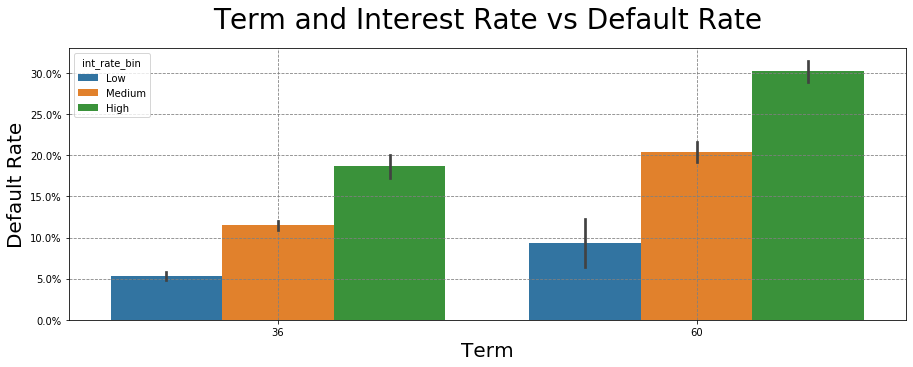

In [276]:
mybarstacked(df_master_loan,"term","int_rate_bin","Term and Interest Rate vs Default Rate","Term","Default Rate")

<b>Observation</b>:<br>
Across all Loan Terms ,As increasing interest rates are leading to increasing rate of defaults.<br>
Loan Applicants with High Interest Rates with Loan Term 60 months have 30% chance of defaulting on a Loan.

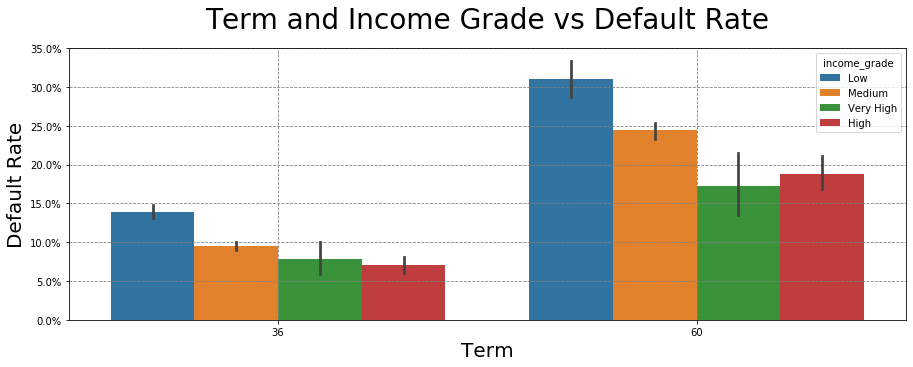

In [277]:
mybarstacked(df_master_loan,"term","income_grade","Term and Income Grade vs Default Rate","Term","Default Rate")

<b>Observation</b>:<br>
Across all Loan Terms ,As annual income is increasing the default rate is going down.<br>
Applicants with Loan Term of 60 months in Income Grade Low(i.e < $40000) have high default rate of 31%.

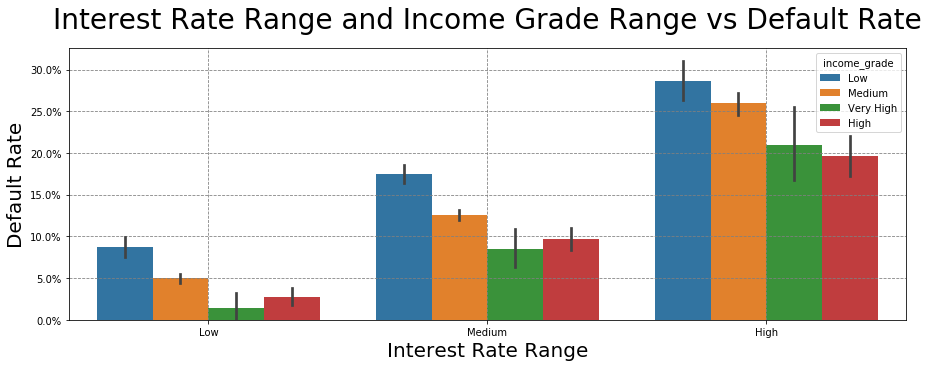

In [278]:
mybarstacked(df_master_loan,"int_rate_bin","income_grade","Interest Rate Range and Income Grade Range vs Default Rate",
            "Interest Rate Range","Default Rate")

<b>Observation</b>:<br>
Irrespective of the Loan Term , Applicants with Low Income Grade(i.e < $40000) have High Default Rates across Low,Meidum and High Interest Ranges.

Low Income Applicants with interest rate in High range(i.e >15%) have default rate of 29%.

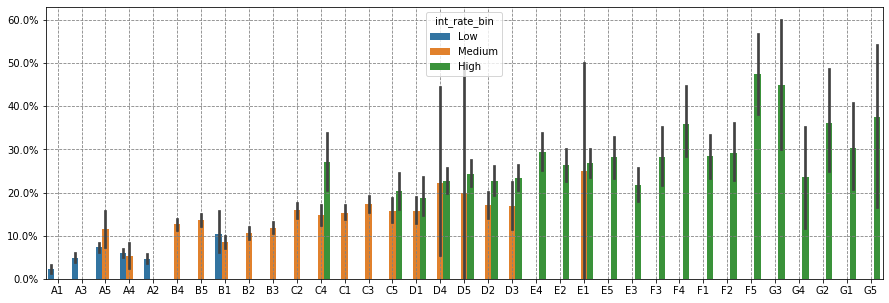

In [279]:
mybarstacked(df_master_loan,"sub_grade","int_rate_bin")

Assumption: Grading starts with A1 considered as the best Sub Grade<br>
<b>Observation</b>:<br>
As the Grading is going down ,Interest Rate is going up which is leading to an increase in default rate.

Analysing - __dti__

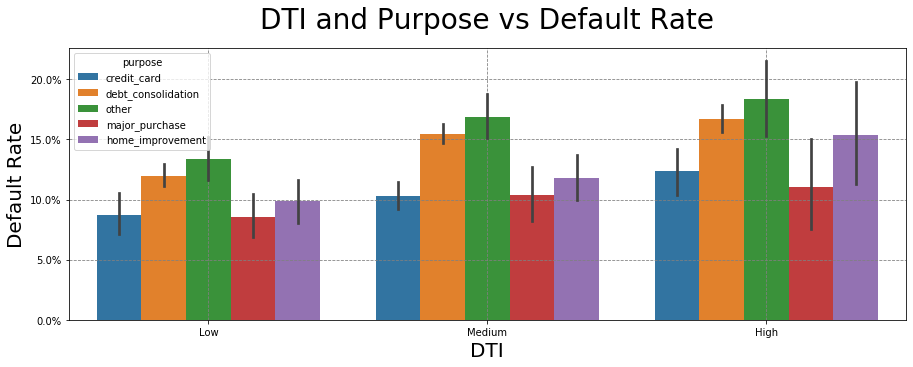

In [280]:
mybarstacked(df_master_loan_top5purp, "dti_range", "purpose",
     "DTI and Purpose vs Default Rate",
     "DTI",
      "Default Rate"  
     )
plt.show()

<b>Observation</b>:<br>
Irrespective of DTI range Other,Debt_consolidation categories in purpose have high rates of default. 
As the DTI increases , default rates in these two categories are increasing.

Analysing - __grade__

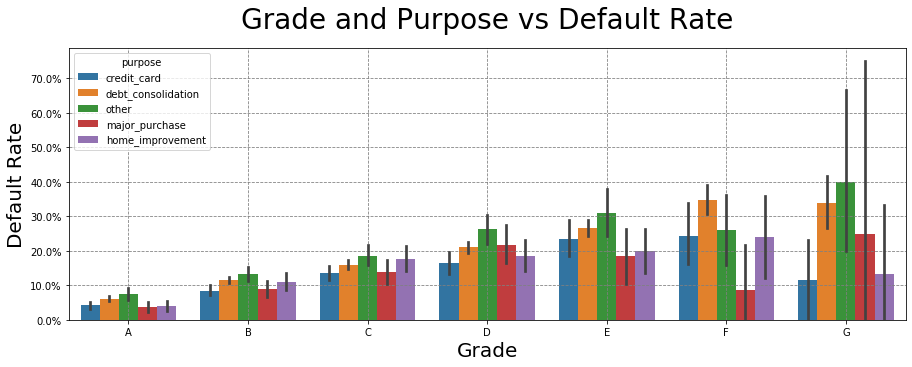

In [281]:
mybarstacked(df_master_loan_top5purp, "grade", "purpose",
     "Grade and Purpose vs Default Rate",
     "Grade",
      "Default Rate"  
     )
plt.show()

Assumption: Grading starts with A considered as the best Grade<br>
<b>Observation</b>:<br>
Across all purpose categories default rates are on the rise as the grade is decreasing.

Analysing - __funded_amnt_inv_range__

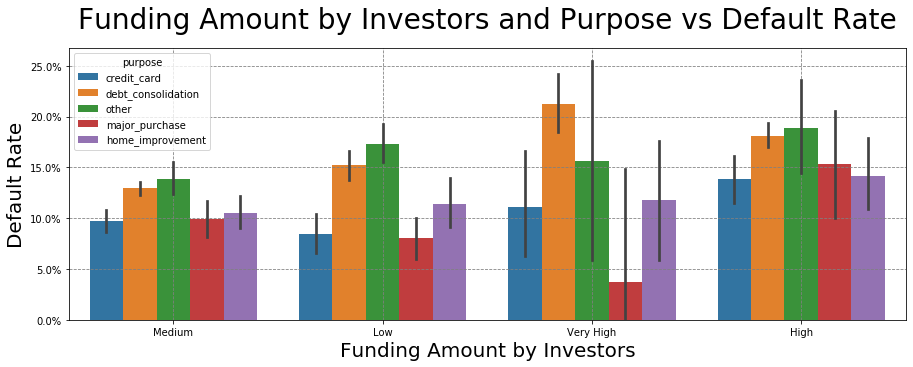

In [282]:
mybarstacked(df_master_loan_top5purp, "funded_amnt_inv_range", "purpose",
     "Funding Amount by Investors and Purpose vs Default Rate",
     "Funding Amount by Investors",
      "Default Rate"  
     )
plt.show()

<b>Observation</b>:<br>
Irrespective of Funding Amount by Investors range,Other and debt_consolidation loan purpose categories have consistently high default rates.

Analyzing - __installment__

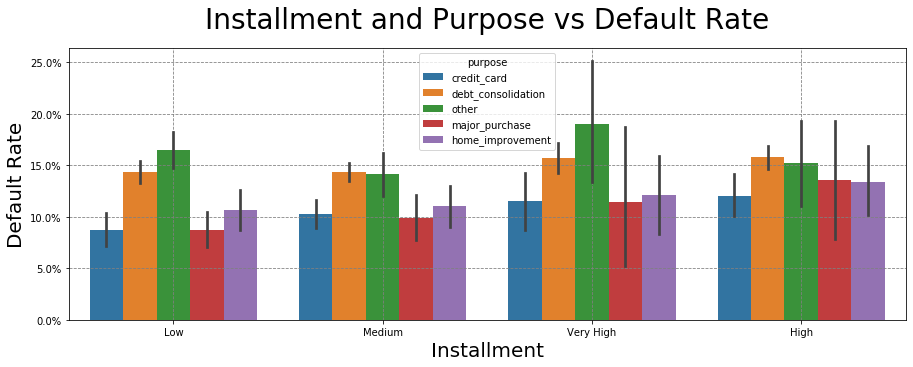

In [283]:
mybarstacked(df_master_loan_top5purp, "installment_range","purpose",
     "Installment and Purpose vs Default Rate",
    "Installment",
     "Default Rate"  
     )
plt.show()

<b>Observation</b>:<br>
In Very High Installment Range Loan purpose categories Other,debt_consolidation have high default rate.

Analysing - __issue_month__

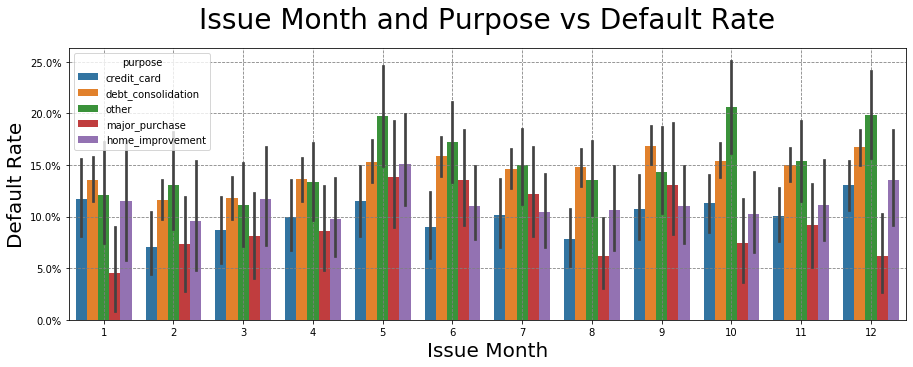

In [284]:
mybarstacked(df_master_loan_top5purp, "issue_month", "purpose",
     "Issue Month and Purpose vs Default Rate",
     "Issue Month",
      "Default Rate"  
     )
plt.show()

<b>Observation</b>:<br>
Across all loan purposes default rate is on the rise for the last 3 months of the year especially for the Other Category.

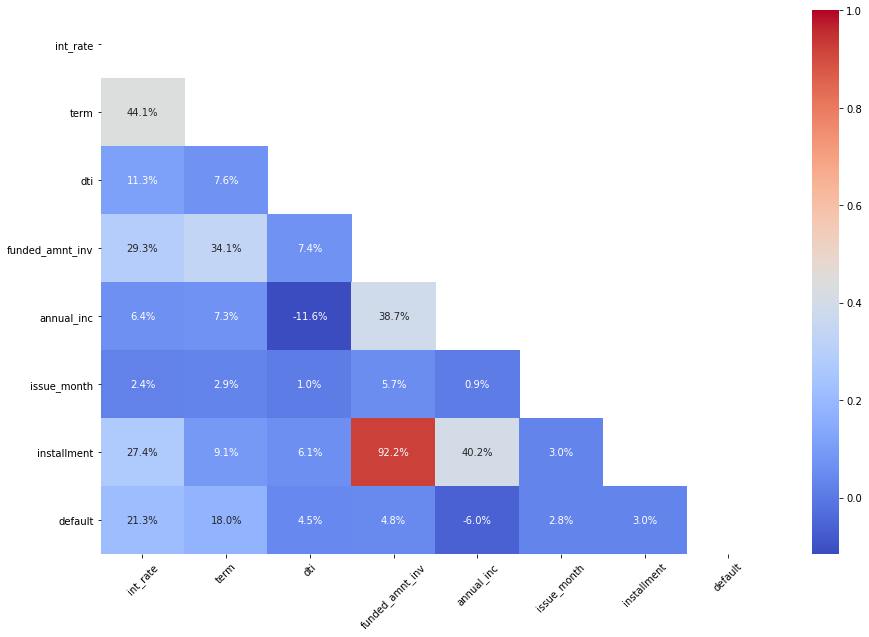

In [285]:
#Heat Map provides the correlation between determined variables.
driver_variables     =     ["int_rate",
                            "term",
                            "dti",
                            "funded_amnt_inv",
                            #grade, - Non Numeric 
                            #sub_grade, - Non Numeric
                            "annual_inc",
                            "issue_month",
                            "installment",
                            "default" 
                            #default is not a driver variable. It is added for analysis.
                           ]
mask_ut=np.triu(np.ones(df_master_loan[driver_variables].corr(method='spearman').shape)).astype(np.bool)
plt.figure(figsize=(15,10))
sns.heatmap(df_master_loan[driver_variables].corr(),cmap="coolwarm",annot=True,mask=mask_ut,fmt='.1%') 
plt.xticks(rotation=45)
plt.show()

<b>Observations from Heat Map</b>:<br>
1. term and interest have a positive co-relation of __44.1%__.
2. term and funded amount by investors have a positive co-relation of __34.1%__.
3. interest rate and funded amount by investors have positive co-relation of __29.3%__.
4. interest rate and installment have positive co-relation of __27.4%__.
5. annual income and funded amount by investors have positive co-relation of __38.7%__.
6. annual income and installment have positive co-relation of __40.2%__.
7. default rate and interest rate have positive co-relation of __21.3%__.
8. default rate and term have positive co-relation of __18.0%__.
9. funded amount by investors and installment have positive co-relation of __92.2%__.

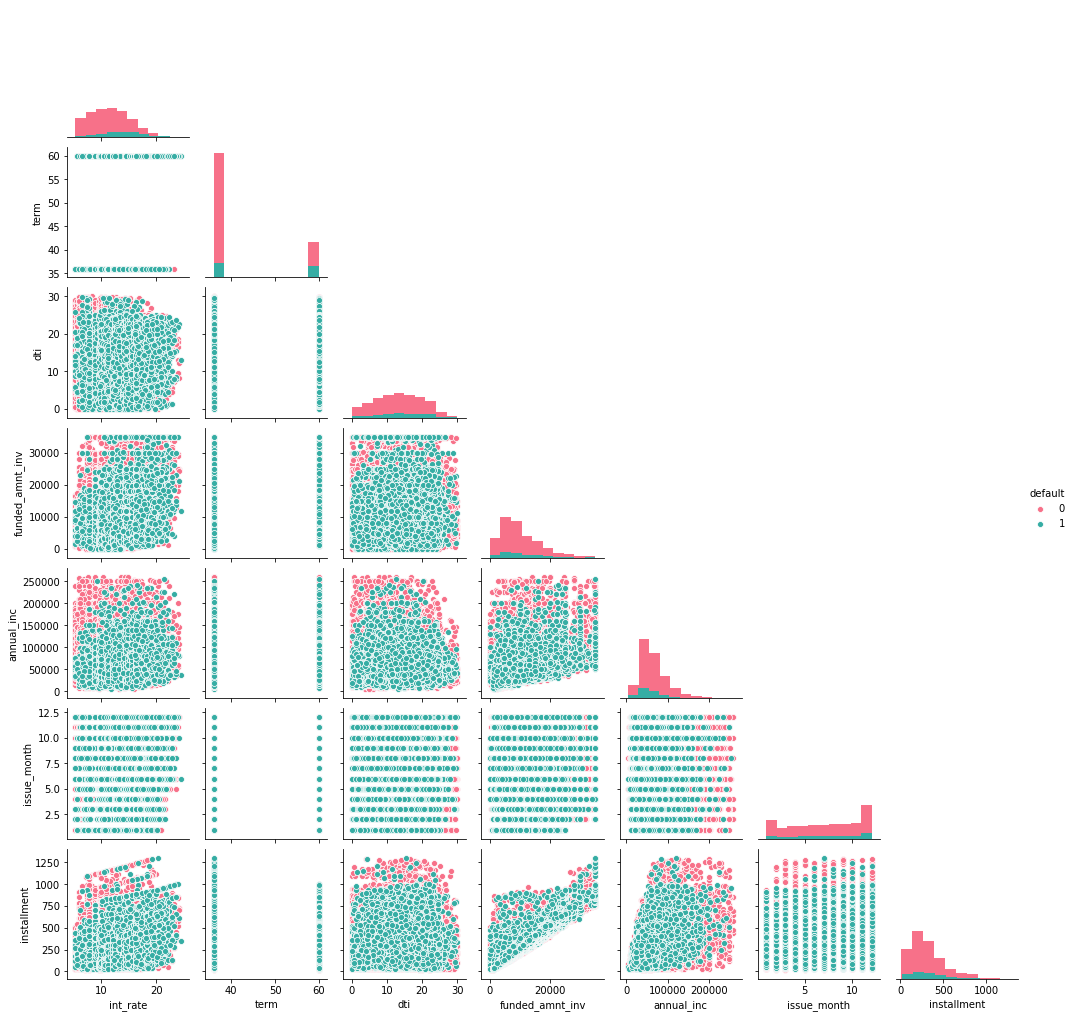

In [286]:
#lets visualize the driver variables in pair plot
sns.pairplot(df_master_loan[driver_variables],diag_kind="hist",hue="default",corner=True,height = 2,palette="husl")
plt.show()